<a href="https://colab.research.google.com/github/arpitabhagat20/Data-Science/blob/main/Combined_Report_Drug_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT -4**



**Abstract**

This dataset about drugs and its consumption based on some features like Nscore, Escore, Oscore, Ascore, Impulsive, SS etc. It is used in drug industry to check the consumption of drugs.



**AIM**

In this assignment we aim to create a complete ML project with


*   Checking Data Quality
* Feature Selection
* Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning
* Model Interpretibility
* Reports and Visualizations

**Column Description for our Dataset**

Kaggle - https://raw.githubusercontent.com/arpitabhagat20/Data-Science/main/Drug_Consumption.csv

**Predictor variables/ Independent Variables**

* Nscore - Nscore (Real) is NEO-FFI-R Neuroticism
* Escore - Escore (Real) is NEO-FFI-R Extraversion
* Oscore - Oscore (Real) is NEO-FFI-R Openness to experience
* AScore - Ascore (Real) is NEO-FFI-R Agreeableness.
* Cscore - Cscore (Real) is NEO-FFI-R Conscientiousness.
* Impulsive - Impulsive (Real) is impulsiveness measured by BIS-11
* SS - SS (Real) is sensation seeing measured by ImpSS

   



In [ ]:
#installing dependencies
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=007e134796616a0736222ee6c99bff18a52baf55f72223d99fddbb1e94d55551
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


Feature Attributes for Quantified Data:

ID: is a number of records in an original database. Cannot be related to the participant. It can be used for reference only.

Age (Real) is the age of participant

Gender: Male or Female

Education: level of education of participant

Country: country of origin of the participant

Ethnicity: ethnicity of participant

Nscore (Real) is NEO-FFI-R Neuroticism

Escore (Real) is NEO-FFI-R Extraversion

Oscore (Real) is NEO-FFI-R Openness to experience.

Ascore (Real) is NEO-FFI-R Agreeableness.

Cscore (Real) is NEO-FFI-R Conscientiousness.

Impulsive (Real) is impulsiveness measured by BIS-11

SS (Real) is sensation seeing measured by ImpSS

Alcohol: alcohol consumption

Amphet: amphetamines consumption

Amyl: nitrite consumption

Benzos: benzodiazepine consumption

Caff: caffeine consumption

Cannabis: marijuana consumption

Choc: chocolate consumption

Coke: cocaine consumption

Crack: crack cocaine consumption

Ecstasy: ecstasy consumption

Heroin: heroin consumption

Ketamine: ketamine consumption

Legalh: legal highs consumption

LSD: LSD consumption

Meth: methadone consumption

Mushroom: magic mushroom consumption

Nicotine: nicotine consumption

Semer: class of fictitious drug Semeron consumption (i.e. control)

VSA: class of volatile substance abuse consumption

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
#Reading the ablone dataset
data = pd.read_csv("https://raw.githubusercontent.com/arpitabhagat20/Data-Science/main/Drug_Consumption.csv")

In [ ]:
#Viewing data in the file
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


The read_csv() is a function in pandas library that is used to read a CSV file

In [ ]:
#function for coverting binary to yes/no

def convert_binary_to_yesno(x):
    if x == 1:
        return "Yes"
    else:
        return "No"

In [ ]:
#Converting ID as to a Yes/No field  for our Analysis
data['ID'] = data['ID'].apply(convert_binary_to_yesno)

Text(0, 0.5, 'ID')

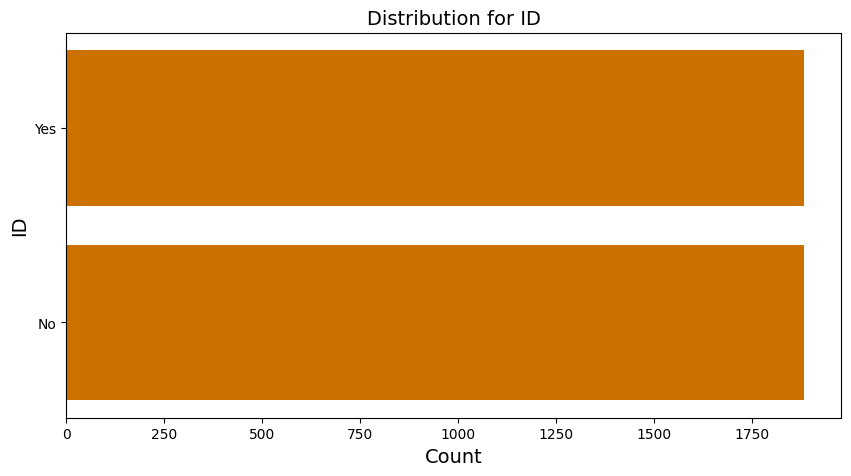

In [ ]:
#Checking if ID has 1 and 0 only(binary)
data['ID'].value_counts()
plt.figure(figsize=(10,5))
plt.barh(['No','Yes'],data['ID'].value_counts(), color ="#cc7000")
plt.title('Distribution for ID', size =14)
plt.xlabel("Count", size =14)
plt.ylabel("ID", size =14)

Observations: We hereby declare it as a yes/no field.

In [ ]:
#Checking for duplicate values
data=data.drop_duplicates()


In [ ]:
print(data.duplicated().value_counts())

False    1884
dtype: int64


**What are the data types?**

In [ ]:
# checking the data types
data.dtypes


ID            object
Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
AScore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [ ]:
#Getting the list of categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
#Getting the list of numerical columns
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
#Printing the list of categorical and numerical columns
print("--------------------------------------------------------")
print("                 Categorical Variables                  ")
print("--------------------------------------------------------")
print(f'Total number of categorical variables in our dataset: {len(categorical_cols)}')
for row,col in enumerate(categorical_cols):
    print(f'{row+1}. {col}')
print("\n")
print("--------------------------------------------------------")
print("                 Numerical Variables                  ")
print("--------------------------------------------------------")
print(f'Total number of numerical variables in our dataset: {len(numerical_cols)}')
for row,col in enumerate(numerical_cols):
    print(f'{row+1}. {col}')

--------------------------------------------------------
                 Categorical Variables                  
--------------------------------------------------------
Total number of categorical variables in our dataset: 25
1. ID
2. Age
3. Gender
4. Education
5. Country
6. Ethnicity
7. Alcohol
8. Amphet
9. Amyl
10. Benzos
11. Caff
12. Cannabis
13. Choc
14. Coke
15. Crack
16. Ecstasy
17. Heroin
18. Ketamine
19. Legalh
20. LSD
21. Meth
22. Mushrooms
23. Nicotine
24. Semer
25. VSA


--------------------------------------------------------
                 Numerical Variables                  
--------------------------------------------------------
Total number of numerical variables in our dataset: 7
1. Nscore
2. Escore
3. Oscore
4. AScore
5. Cscore
6. Impulsive
7. SS


Hence,  we seperated the caterogical and numerical data.

**Are there any missing values?**

In [ ]:
#checking if the any data is missing
data.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
AScore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

We have no missing values in our independent and dependent variables.

**Checking for naN**

In [ ]:
data.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
AScore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

Hence no missing values in dependent and independent variables

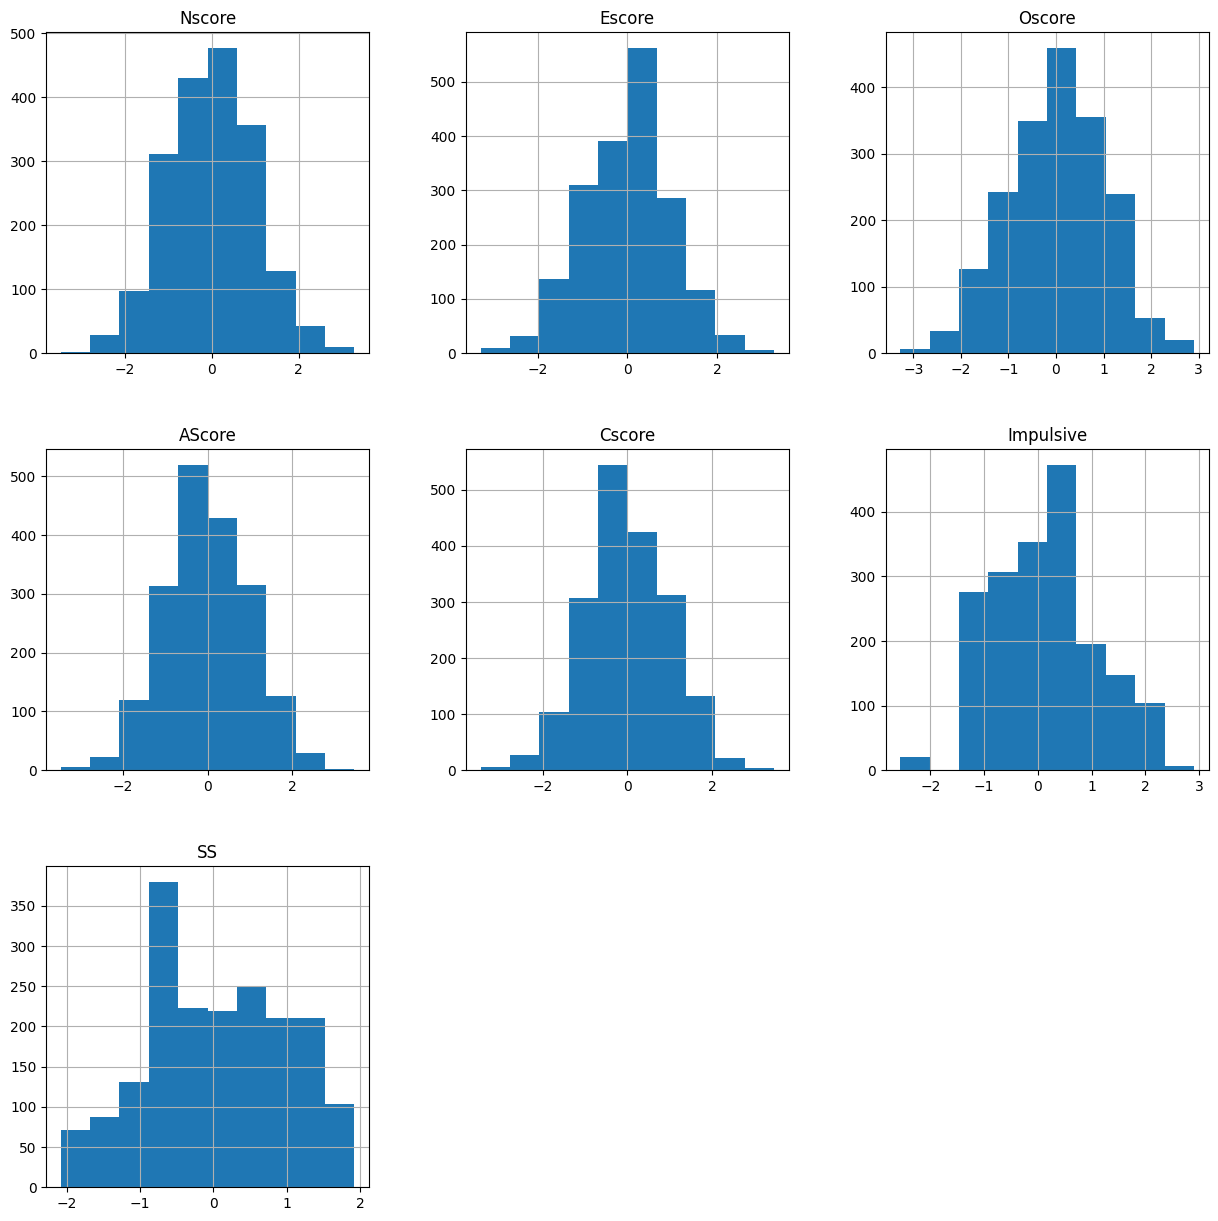

In [ ]:
#generating histograms
plot = data.hist(figsize=(15,15))

Plotting histograms for each numerical column in the dataframe.
The hist() function in pandas is used to generate histograms for all numerical columns in a dataframe.



In [ ]:
#Dropping dependent valirable from dataframe
datafinal = data.drop('Nscore', axis=1)

**What are the distributions of the predictor variables?**

<Figure size 800x500 with 0 Axes>

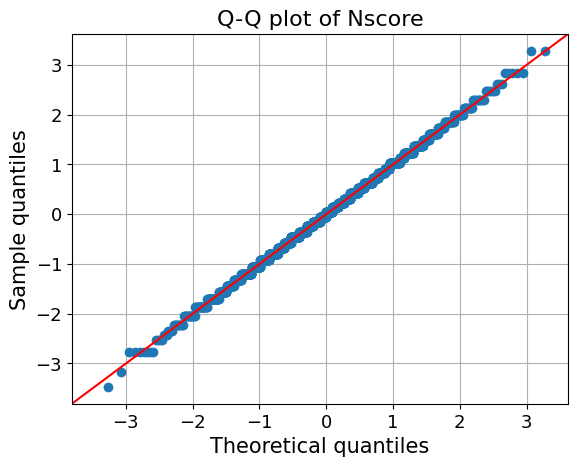

<Figure size 800x500 with 0 Axes>

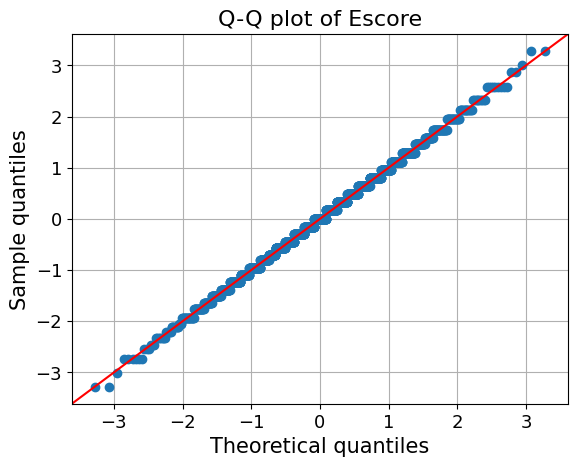

<Figure size 800x500 with 0 Axes>

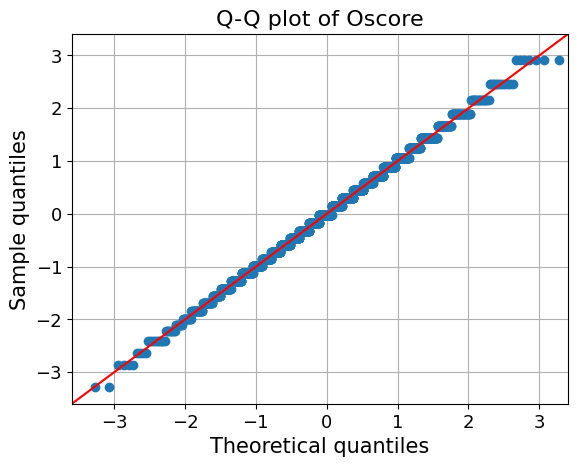

<Figure size 800x500 with 0 Axes>

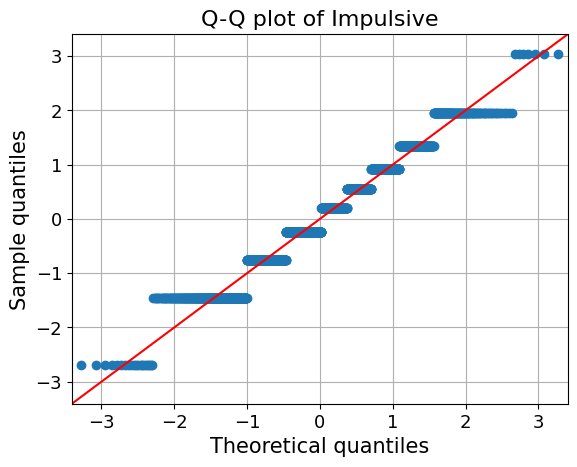

<Figure size 800x500 with 0 Axes>

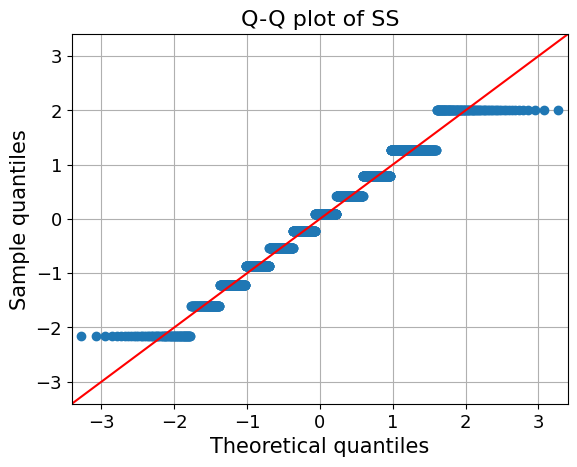

In [ ]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[[ 'Nscore', 'Escore', 'Oscore', 'Impulsive',
       'SS']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

<ipython-input-20-0a2eeffaa5a0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


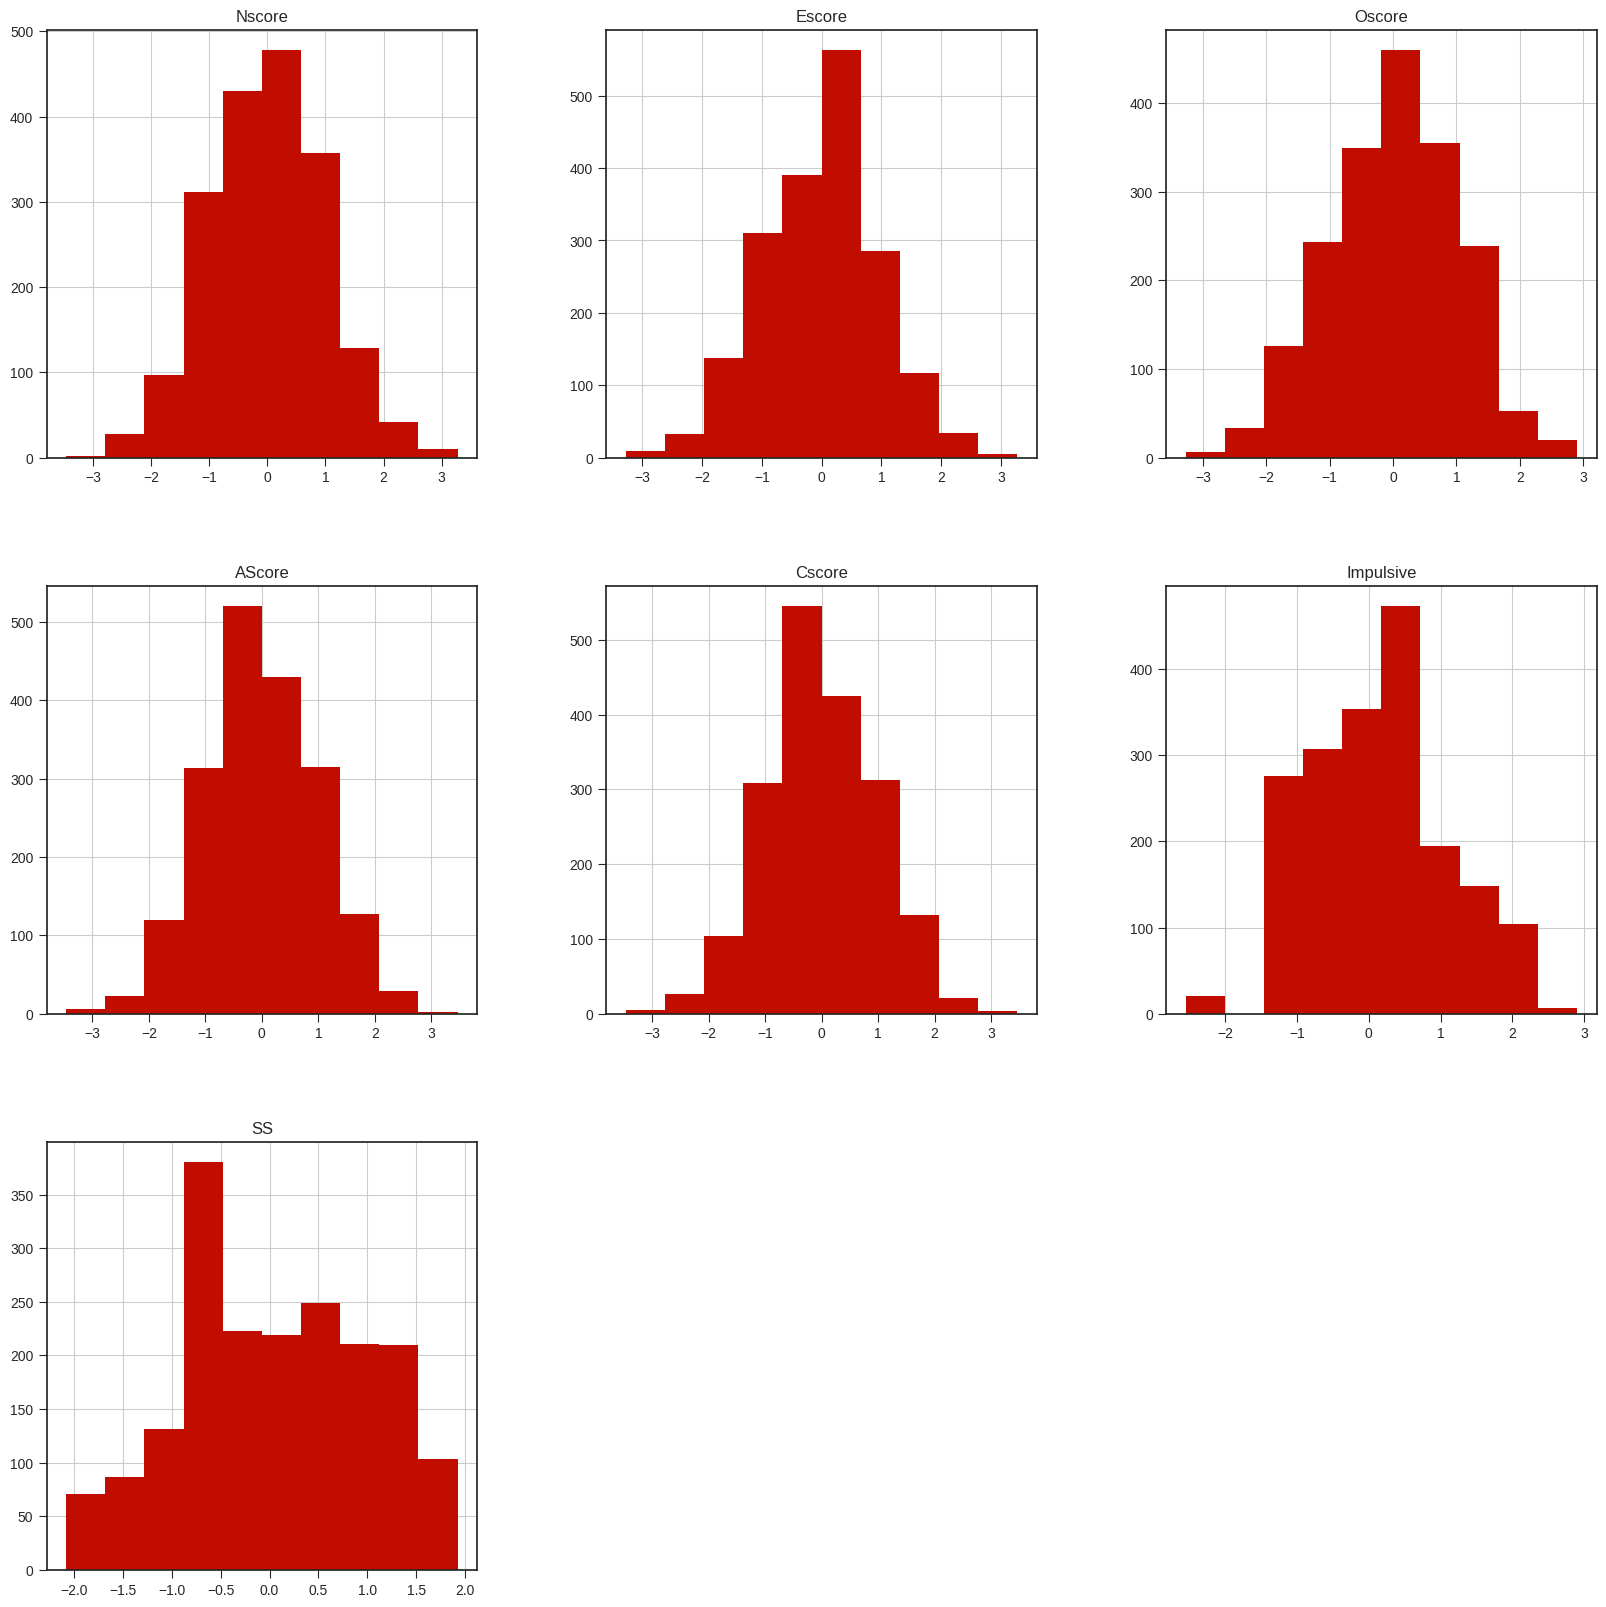

In [ ]:
plt.style.use('seaborn-ticks')

data.hist(bins=10, figsize=(20,20), color='#c00d00')
plt.show();

<Axes: >

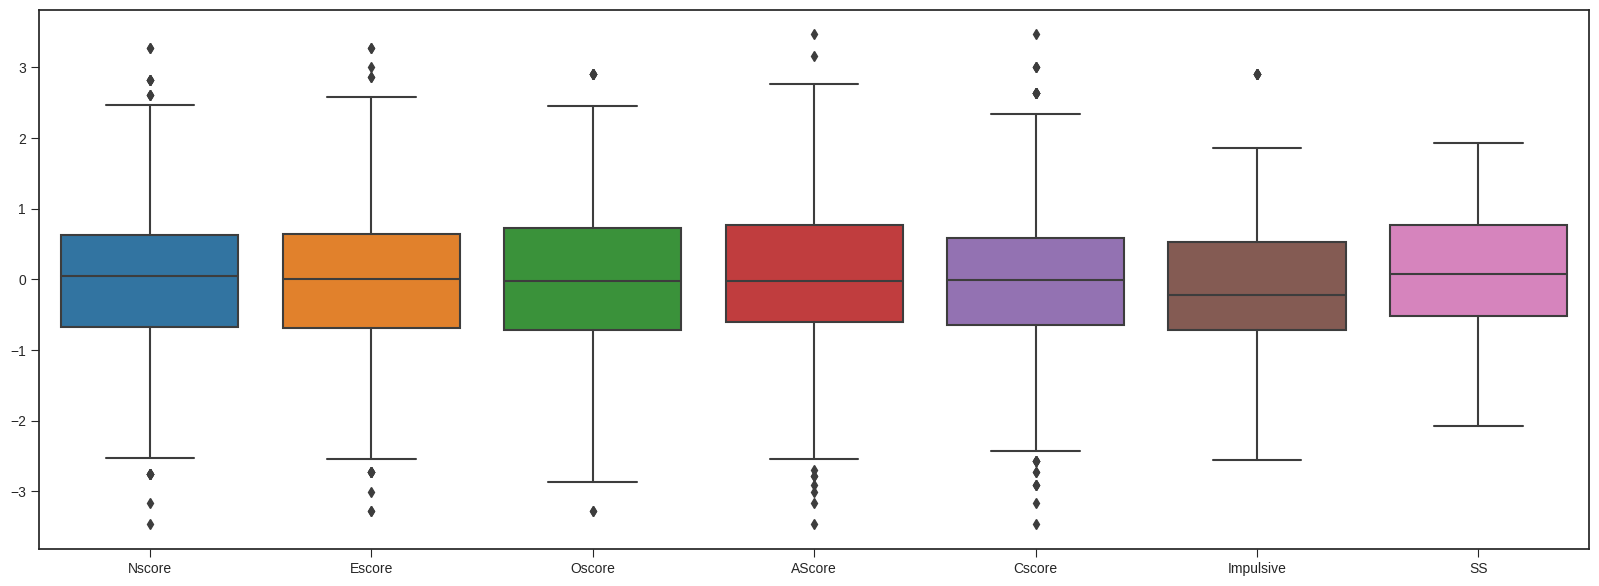

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

**Do the range of predictor variables make sense?**





<Axes: >

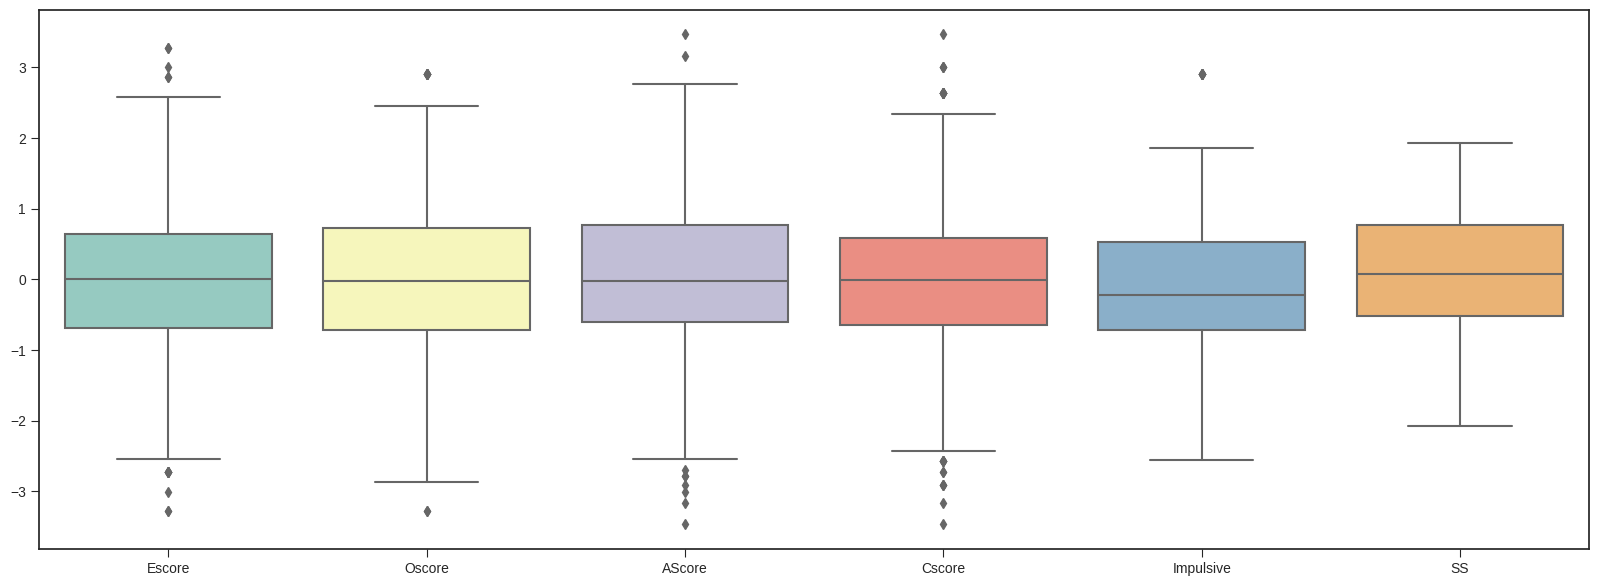

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=datafinal, palette="Set3")


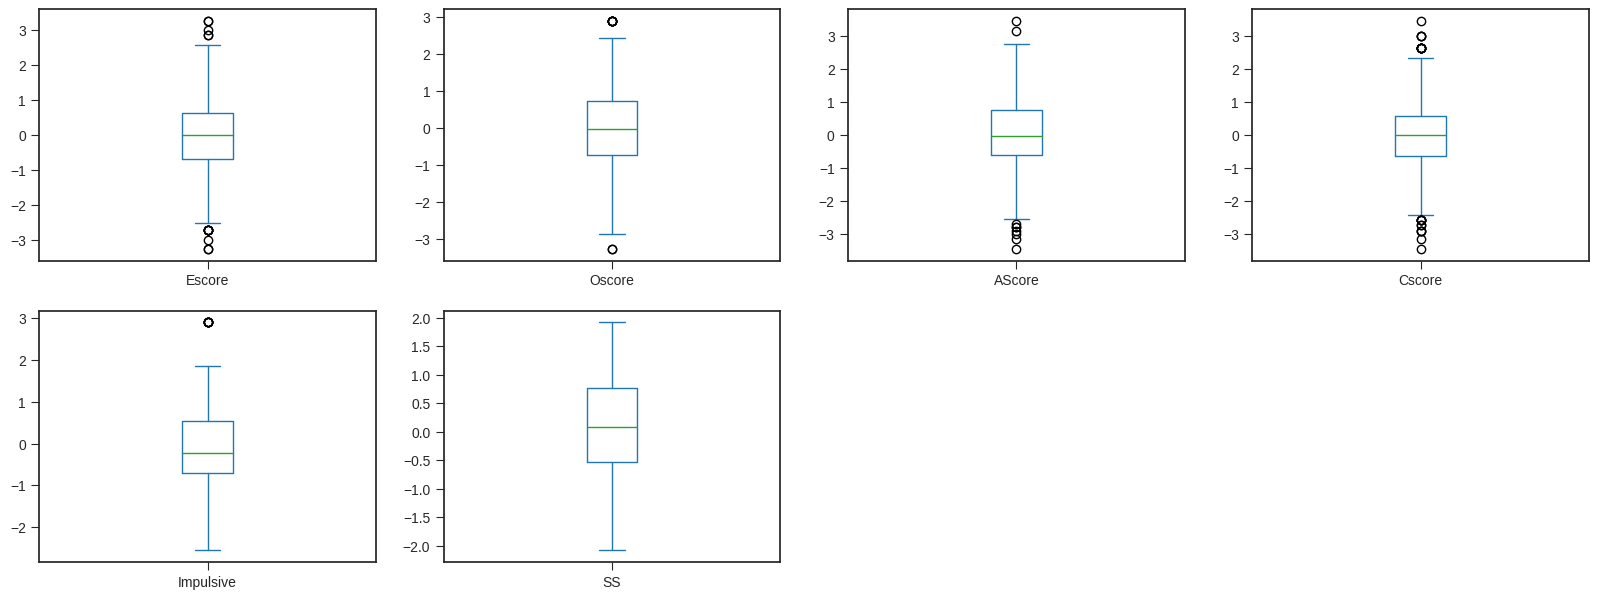

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for all numeric variables
datafinal.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))
plt.show()

**Normalizing**

In [ ]:
#Creating binary vaiables

data = pd.get_dummies(data)

# Normalizing the data in the ids column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[['SS']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['SS']] = pd.DataFrame(x_scaled)

In [ ]:
#data after nromalizing and feature creation
data.head()

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,ID_No,Age_18-24,Age_25-34,...,Semer_CL2,Semer_CL3,Semer_CL4,VSA_CL0,VSA_CL1,VSA_CL2,VSA_CL3,VSA_CL4,VSA_CL5,VSA_CL6
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,0.465658,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.619957,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,0.224398,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,0.465658,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,0.132468,1,0,0,...,0,0,0,1,0,0,0,0,0,0


<ipython-input-26-01399526d3af>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], fit = stats.norm)
<ipython-input-26-01399526d3af>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], fit = stats.norm)
<ipython-input-26-01399526d3af>:7: UserWarning: 

`distplot` is a deprecated fun

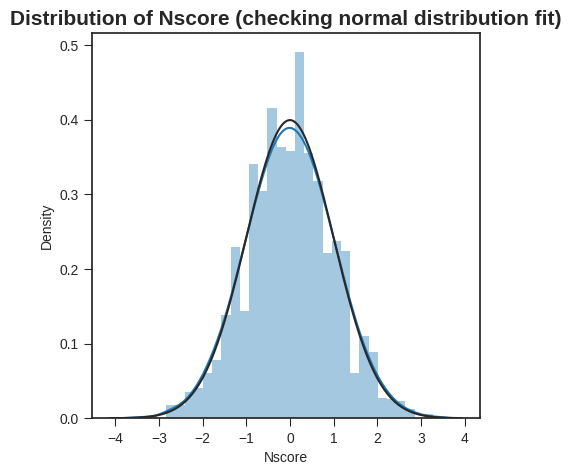

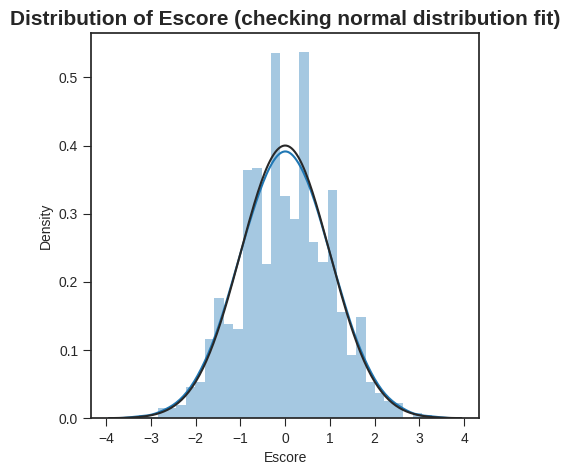

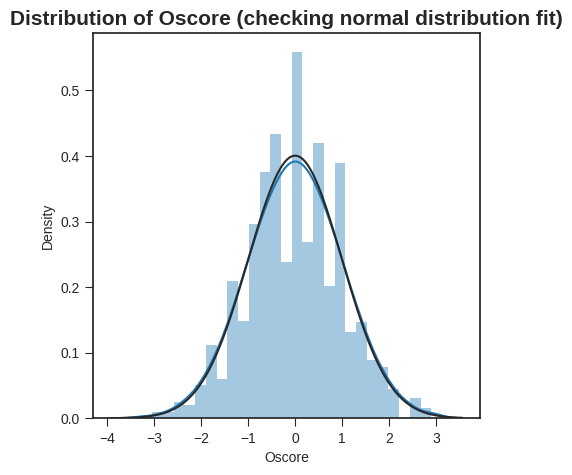

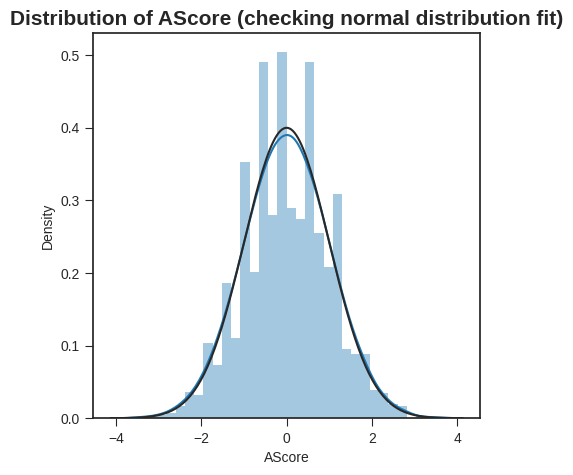

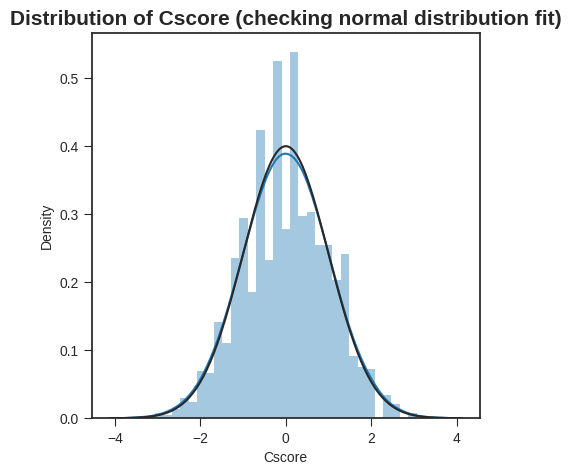

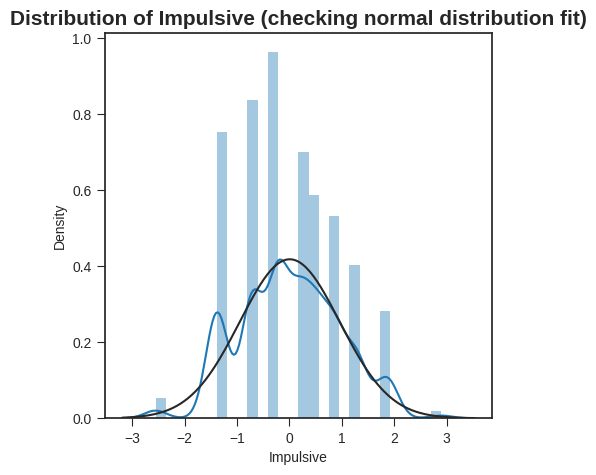

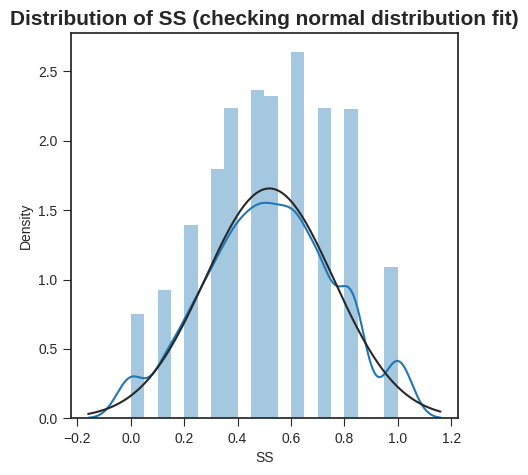

In [ ]:
#checking the distribtion of independent(predictor) variables
datalist= ['Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS']

for i in datalist:
    from scipy import stats
    plt.figure(figsize= (5,5))
    sns.distplot(data[i], fit = stats.norm)
    plt.title(f"Distribution of {i} (checking normal distribution fit)",size = 15, weight = "bold")

We observe that Nscore, Escore,Oscore, AScore, Cscore have normal distribution whereas Impulsive and SS don't have a normal distribution.

In [ ]:
#data after noromalizing and feature creation
data.describe()


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,ID_No,Age_18-24,Age_25-34,...,Semer_CL2,Semer_CL3,Semer_CL4,VSA_CL0,VSA_CL1,VSA_CL2,VSA_CL3,VSA_CL4,VSA_CL5,VSA_CL6
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.0,1884.000000,1884.000000,...,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,-0.000119,0.000143,-0.000225,0.000242,-0.000383,0.007335,0.518926,1.0,0.341295,0.255308,...,0.001592,0.001062,0.000531,0.771762,0.106157,0.071656,0.032378,0.006900,0.007431,0.003715
std,0.998345,0.997625,0.996402,0.997481,0.997787,0.954674,0.240881,0.0,0.474270,0.436150,...,0.039883,0.032573,0.023039,0.419808,0.308120,0.257986,0.177049,0.082802,0.085905,0.060858
min,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,0.388117,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.539559,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.710933,1.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

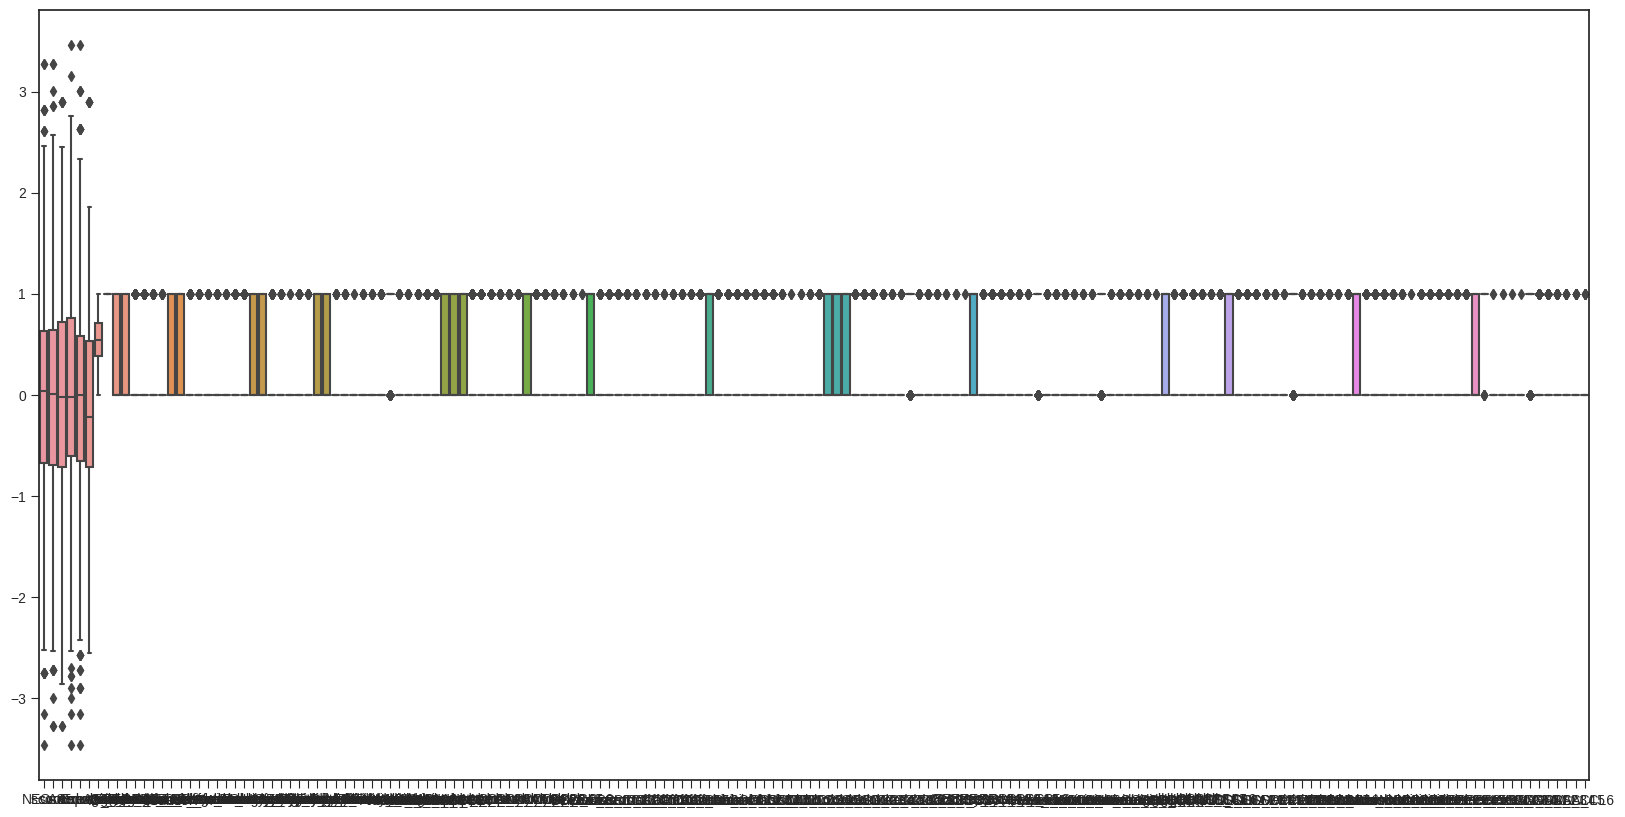

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,10))
sns.boxplot(data=data)

In [ ]:
#checking the correlation between all the features in the data
data.corr()


,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,ID_No,Age_18-24,Age_25-34,...,Semer_CL2,Semer_CL3,Semer_CL4,VSA_CL0,VSA_CL1,VSA_CL2,VSA_CL3,VSA_CL4,VSA_CL5,VSA_CL6
Nscore,1.000000,-0.431004,0.010275,-0.216865,-0.391098,0.174445,0.080225,NaN,0.083111,0.040490,...,0.021720,-0.015098,-0.010786,-0.125539,0.060808,0.057691,0.095259,0.014735,-0.010464,0.031152
Escore,-0.431004,1.000000,0.245142,0.157103,0.308049,0.114091,0.209858,NaN,0.014037,0.034374,...,-0.010477,0.015272,0.018602,0.058633,-0.042306,-0.038127,-0.029037,0.005543,0.036718,-0.003540
Oscore,0.010275,0.245142,1.000000,0.038242,-0.056818,0.277468,0.421535,NaN,0.228866,-0.018811,...,0.042476,-0.009029,0.006792,-0.136403,0.017873,0.130578,0.053584,0.022087,0.051436,0.038356
AScore,-0.216865,0.157103,0.038242,1.000000,0.247534,-0.229860,-0.208787,NaN,-0.067439,0.017637,...,0.019223,-0.019810,0.047131,0.126220,-0.065935,-0.078662,-0.029689,-0.039697,-0.032323,-0.017396
Cscore,-0.391098,0.308049,-0.056818,0.247534,1.000000,-0.335139,-0.229133,NaN,-0.189600,0.040419,...,0.001483,-0.024592,0.041864,0.165359,-0.038297,-0.134298,-0.103028,-0.058389,-0.012207,0.018934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VSA_CL2,0.057691,-0.038127,0.130578,-0.078662,-0.134298,0.149191,0.197222,NaN,0.190652,0.021397,...,0.040518,-0.009057,-0.006402,-0.510881,-0.095745,1.000000,-0.050821,-0.023158,-0.024039,-0.016966
VSA_CL3,0.095259,-0.029037,0.053584,-0.029689,-0.103028,0.072941,0.092391,NaN,0.178233,-0.052088,...,-0.007305,-0.005963,0.125980,-0.336372,-0.063040,-0.050821,1.000000,-0.015248,-0.015828,-0.011171
VSA_CL4,0.014735,0.005543,0.022087,-0.039697,-0.058389,0.056665,0.065471,NaN,0.075232,-0.004691,...,-0.003329,-0.002717,-0.001921,-0.153279,-0.028726,-0.023158,-0.015248,1.000000,-0.007212,-0.005090
VSA_CL5,-0.010464,0.036718,0.051436,-0.032323,-0.012207,0.063970,0.103790,NaN,0.055031,0.006034,...,-0.003455,-0.002821,-0.001994,-0.159108,-0.029819,-0.024039,-0.015828,-0.007212,1.000000,-0.005284


This gives us the correlation between all the data

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

NameError: ignored

<Figure size 2000x700 with 0 Axes>



1.  The graph indicates that there is not much correlation between features.

2.   The range lies between -0.4-1.









 Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

**1) OLS Method**

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['VSA_CL1'], data[['Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS']]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                VSA_CL1   R-squared (uncentered):                   0.108
Model:                            OLS   Adj. R-squared (uncentered):              0.105
Method:                 Least Squares   F-statistic:                              32.46
Date:                Sun, 13 Aug 2023   Prob (F-statistic):                    8.63e-43
Time:                        01:04:39   Log-Likelihood:                         -452.90
No. Observations:                1884   AIC:                                      919.8
Df Residuals:                    1877   BIC:                                      958.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Nscore         0.0111      0.008      1.322      0.186      -0.005       0.028
Escore        -0.0145      0.009     -1.684      0.092      -0.031       0.002
Oscore        -0.0053      0.008     -0.685      0.493      -0.020       0.010
AScore        -0.0107      0.008     -1.409      0.159      -0.026       0.004
Cscore         0.0045      0.008      0.535      0.593      -0.012       0.021
Impulsive     -0.0165      0.009     -1.892      0.059      -0.034       0.001
SS             0.1894      0.013     14.575      0.000       0.164       0.215
==============================================================================
Omnibus:                      904.036   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.771
Skew:                           2.483   Prob(JB):                         0.00
Kurtosis:                       7.366   Cond. No.                         2.62
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, Considering the significance value of 0.05

The Nscore has the p-value 0, which is lesser and hence it is a significant feature.

The Escorehas the p-value 0, which is lesser and hence it is a significant feature.

The Oscorehas the p-value 0, which is lesser and hence it is a significant feature.

The Ascore has the p-value 0, which is lesser and hence it is a significant feature.

The Impulsive has the p-value 0, which is lesser and hence it is a significant feature.

2) Calculating Z Score Method

In [ ]:
#Calculating Z Score
import pandas as pd
def calculate_z_scores(df):
    return (df - df.mean()) / df.std()
df = pd.DataFrame(data,columns=['ID', 'Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS'])
df = df.apply(pd.to_numeric)
z_scores = calculate_z_scores(df)
print(z_scores)

If the z score of a data point is more than 2 or less than -2 then it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

**Do the training and test sets have the same data?**

**Building the Model (Train ,Validation and Test split)**


In [ ]:
from sklearn.model_selection import  train_test_split

X = data[['Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS']]

y = data['VSA_CL1']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

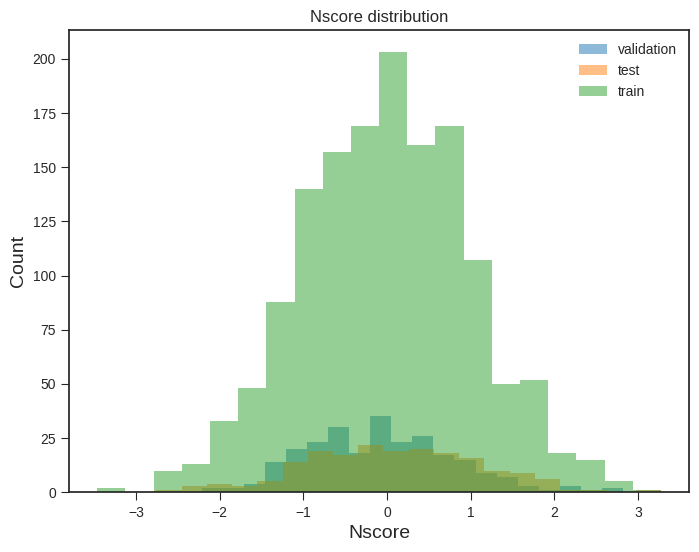

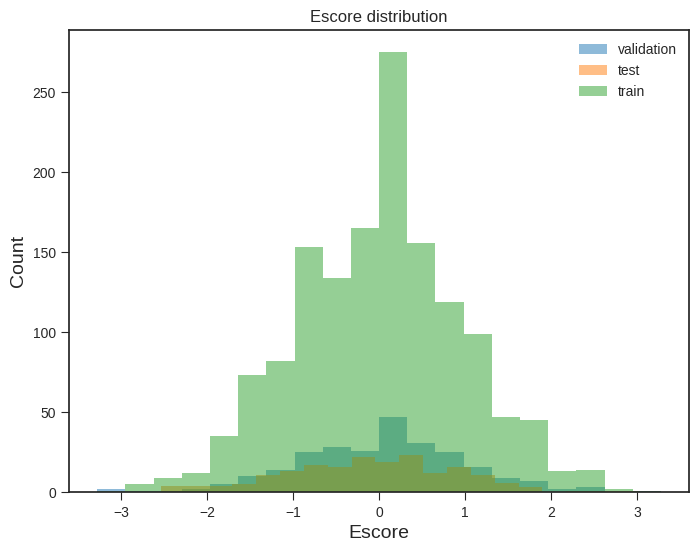

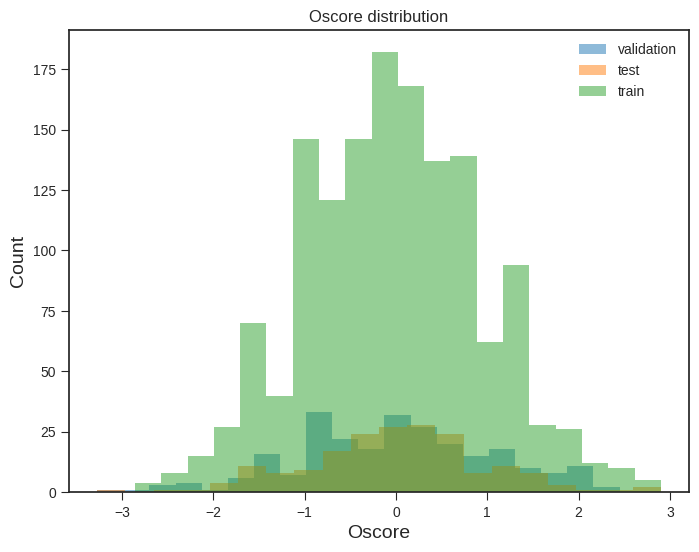

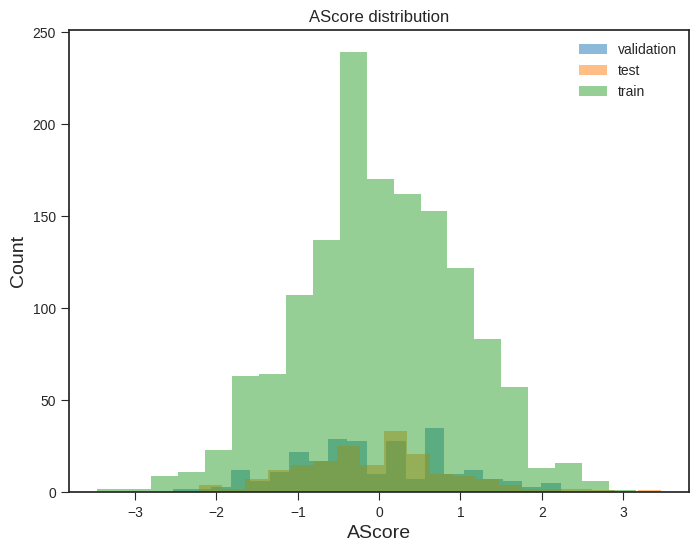

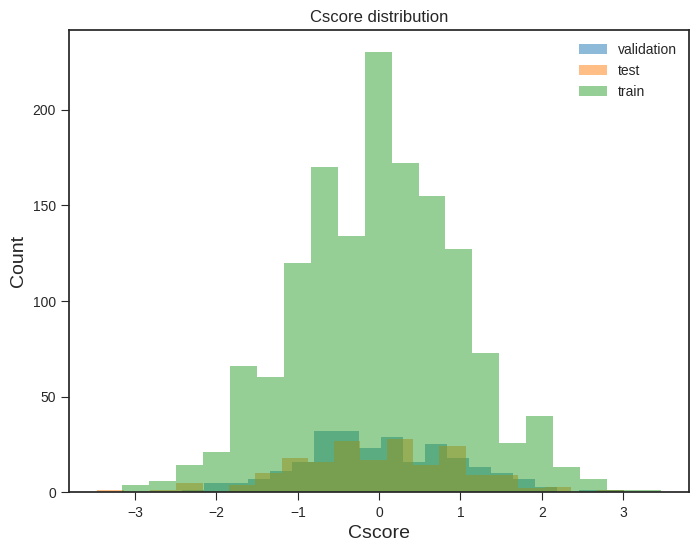

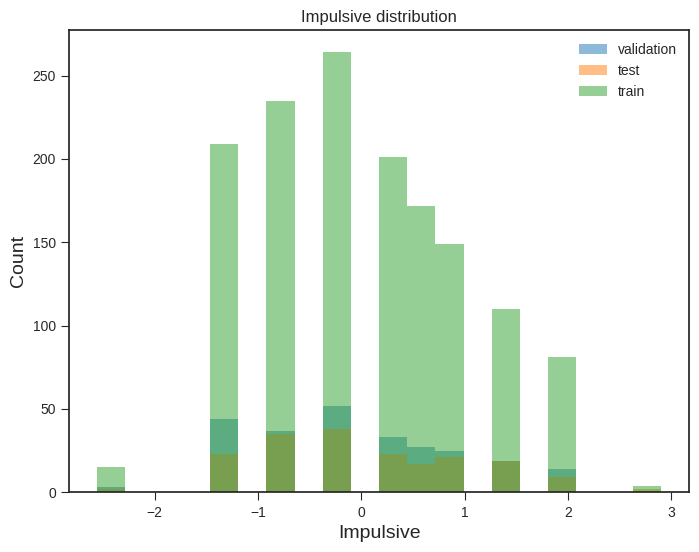

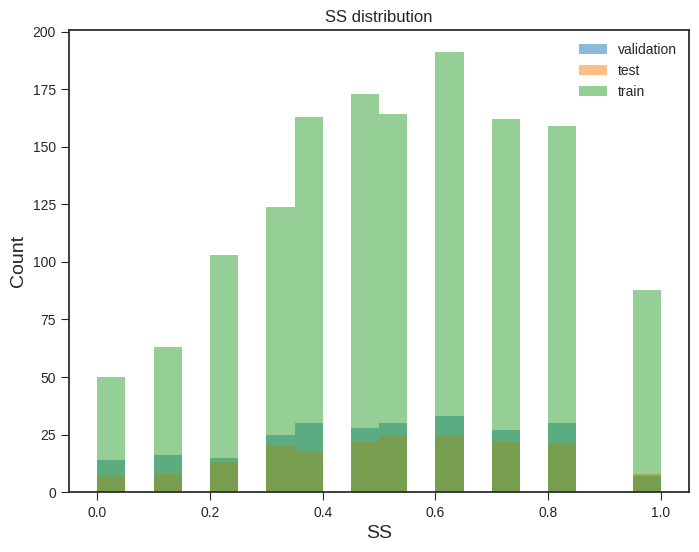

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS']]


X_val_plot = X_val[['Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS']]


X_train_plot = X_train[['Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS']]


# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()



*   The division is based on three factors: Validation, test and train.
*   The division is done accurately in all the variables.



3) Gradient Boosting Classifier Results

In [ ]:
# Using Gradient Boosting Classifier Results

from sklearn import ensemble
model_3=ensemble.GradientBoostingClassifier()
model_3.fit(X_train,y_train)
cols=X_train.columns
plt.figure(figsize=(15, 7))
plt.barh(cols,model_3.feature_importances_, color ="#00b3b3")
plt.title('Feature Importance ', size=14)

This method also gives the same results as the above two methods.

Linear Regression

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

Taining a linear regression model to evaluate its performance by measuring the accracy of models.

In [ ]:
# Create linear regression object
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression()
# Train the model using the training sets
regr.fit(X_train,y_train)
print('Training accuracy : ',regr.score(X_train,y_train)*100)
print('Test accuracy : ',regr.score(X_test,y_test)*100)

In [ ]:
y_pred=model.predict(X_test)
y_pred


Predictions

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

This function uses the model's predictions on the X train training set to assess how well it performed.

The average squared difference between the expected and actual values is measured by the mean squared error (MSE). An improved fit of the model to the data is shown by a lower MSE.

The model's ability to account for data fluctuation is measured by the coefficient of determination (R2) An R2 of 1 denotes a perfect fit, whereas an R2 of 0 denotes that the model does not account for any of the data's variation.

Important features

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?**

In [ ]:
percent=[0.01,0.05,0.1]
train_data = data.astype(float)
cols=list(train_data.columns)
all_rows=[]
all_cols=[]
for per in percent:
    nan_rows_size=int(per*len(train_data))
    random_cols=np.random.choice(np.arange(len(cols)),nan_rows_size,replace=True)
    random_rows=np.random.choice(np.arange(len(train_data)),nan_rows_size,replace=False)
    all_rows.append(random_rows)
    all_cols.append(random_cols)

#creating new dataframe with 1%,5% and 10% missing values
predictors_missing_1_percent=train_data.copy()
for r_index,c_index in zip(all_rows[0],all_cols[0]):
    predictors_missing_1_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_5_percent=train_data.copy()
for r_index,c_index in zip(all_rows[1],all_cols[1]):
    predictors_missing_5_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_10_percent=train_data.copy()
for r_index,c_index in zip(all_rows[2],all_cols[2]):
    predictors_missing_10_percent.at[r_index,cols[c_index]]=np.NaN

In [ ]:
#Printing missing values
print('Number of missing values')
print('1% missing',predictors_missing_1_percent.isna().sum().sum())
print('5% missing',predictors_missing_5_percent.isna().sum().sum())
print('10% missing',predictors_missing_10_percent.isna().sum().sum())
train_data.head(5)

1%, 5%, and 10% of the rows and columns will be chosen at random, and their values will be replaced with NaN to add missing values to the original dataframe "train data."

Specifying the percentages of missing values (1%, 5%, and 10%) that will be inserted into the dataframe in the "percent" list. After that, it constructs a list of column names and changes the dataframe's data type to float.

For the purpose of storing the randomly chosen rows and columns that will be missing values, three empty lists (all rows, all cols) are created. It multiplies the percentage by the total number of rows in the dataframe for each percentage in "percent" to determine how many rows (nan rows size) must have missing values.

The same number of columns and rows as the calculated number of missing data are then randomly chosen using the numpy random.choice() function. The all rows and all cols lists are then updated to include these chosen rows and columns.

Predictors missing 1 percent, Predictors missing 5 percent, and Predictors missing 10 percent are the last three new dataframes it generates. A for loop is used to change the values of the rows and columns that were previously selected in each of the new dataframes with NaN after copying the original dataframe.

In [ ]:
# Dropping NaN value rows from our 1%, 5% and 10% missing values dataframe and creating new dataframes
df_1_percent_without_nan=predictors_missing_1_percent.dropna()
df_5_percent_without_nan=predictors_missing_5_percent.dropna()
df_10_percent_without_nan=predictors_missing_10_percent.dropna()
df_1_percent_without_nan.info()

In [ ]:
# Importing the metrics library from sklearn
from sklearn import metrics as sm
# Defining the function to calculate model performance scores
def performnce_calcuation(y_true,y_pred):
    acc=sm.accuracy_score(y_true,y_pred)
    log_loss=sm.log_loss(y_true,y_pred)
    auc=sm.roc_auc_score(y_true,y_pred)
    confusion_matrix=sm.confusion_matrix(y_true,y_pred)
    return acc,auc,log_loss,confusion_matrix

In this case, the data from the original dataframe is used to create new dataframes, but 1%, 5%, and 10% of the data points are replaced with NaN values. Using the dataframe's at method, values are first set to NaN before the original dataframe is replicated using the copy() method.

From the previously constructed dataframe with missing values, a new dataframe is then created with omitted NA values. For instance, the NaN values from the predictors missing 1 percent dataframe are removed to produce df 1 percent without nan. The dataframe's information is then displayed using the info() method, including the number of non-null values in each column.

**Imputation**

**1) Numerical values with Median and Categorical value with Mode**

In [ ]:
num_cols=['Nscore', 'Escore', 'Oscore',	'AScore',	'Cscore',	'Impulsive', 'SS']

cat_cols=['VSA_CL1']

predict_impute_1=pd.DataFrame()
predict_impute_5=pd.DataFrame()
predict_impute_10=pd.DataFrame()
for col in num_cols:
    predict_impute_1[col]=predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].median())
    predict_impute_5[col]=predictors_missing_5_percent[col].fillna(predictors_missing_5_percent[col].median())
    predict_impute_10[col]=predictors_missing_10_percent[col].fillna(predictors_missing_10_percent[col].median())
for col in cat_cols:
    predict_impute_1[col]=predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].mode())
    predict_impute_5[col]=predictors_missing_5_percent[col].fillna(predictors_missing_1_percent[col].mode())
    predict_impute_10[col]=predictors_missing_10_percent[col].fillna(predictors_missing_1_percent[col].mode())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=4)

predictors=df_1_percent_without_nan.drop('VSA_CL1',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_1_percent_without_nan['VSA_CL1'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_5_percent_without_nan.drop('VSA_CL1',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_5_percent_without_nan['VSA_CL1'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_10_percent_without_nan.drop('VSA_CL1',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_10_percent_without_nan['VSA_CL1'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))

In [ ]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')

In [ ]:
model_firssthand_accuracy = 0.96
plt.figure(figsize=(8, 6))
accuracy=[model_firssthand_accuracy,accuracy_1_te,accuracy_2_te,accuracy_3_te]
log_loss=[log_loss_1_te,log_loss_2_te,log_loss_3_te]
label=['No data imputation','1% imputation','5% imputation','10% imputation']
plt.title('Accuracy plot vs % of data imputation')
plt.ylabel('Accuracy')
plt.xlabel('% of data imputed')
plt.plot(label,accuracy)

There was a steady increase of accuracy for 1% imputation, later it decreased for 5% but then again it increased for 10% imputation.

Using KNN imputer

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

predictors=predict_impute_1.drop('VSA_CL1',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_1=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_5.drop('VSA_CL1',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_5=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_10.drop('VSA_CL1',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_10=pd.DataFrame(final,columns=all_col)

In [ ]:
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=2)
predict_impute_1 = predict_impute_1.dropna()
predict_impute_5 = predict_impute_5.dropna()
predict_impute_10 = predict_impute_10.dropna()

predictors=predict_impute_1.drop('VSA_CL1',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_1['VSA_CL1'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=predict_impute_5.drop('VSA_CL1',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_5['VSA_CL1'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=predict_impute_10.drop('VSA_CL1',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_10['VSA_CL1'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))


In [ ]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")

In [ ]:
model_firssthand_accuracy = 0.97
plt.figure(figsize=(8, 6))
accuracy=[model_firssthand_accuracy,accuracy_1_te,accuracy_2_te,accuracy_3_te]
log_loss=[log_loss_1_te,log_loss_2_te,log_loss_3_te]
label=['No data imputation','1% imputation','5% imputation','10% imputation']
plt.title('Accuracy plot vs % of data imputation')
plt.ylabel('Accuracy')
plt.xlabel('% of data imputed')
plt.plot(label,accuracy)


MICE Imputation technique

In [ ]:
!pip install fancyimpute
#from sklearn.impute import IterativeImputer
from fancyimpute import IterativeImputer as MICE
import pandas as pd


# create a copy of the original dataframe with missing values
df_missing = predictors
df_missing.iloc[2:5,3:6] = np.nan

# create an imputer object
imputer = MICE()

# fit the imputer on the data
imputer.fit(predictors)

#MICE().fit_transform(df)


# perform the imputation
df_imputed = imputer.transform(predictors)

predictors=predict_impute_1.drop('VSA_CL1',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_1=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_5.drop('VSA_CL1',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_5=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_10.drop('VSA_CL1',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_10=pd.DataFrame(final,columns=all_col)

In [ ]:
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=4)

predictors=df_1_percent_without_nan.drop('VSA_CL1',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_1_percent_without_nan['VSA_CL1'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_5_percent_without_nan.drop('VSA_CL1',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_5_percent_without_nan['VSA_CL1'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_10_percent_without_nan.drop('VSA_CL1',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_10_percent_without_nan['VSA_CL1'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))


In [ ]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")


In [ ]:
model_firssthand_accuracy = 0.97
plt.figure(figsize=(8, 6))
accuracy=[model_firssthand_accuracy,accuracy_1_te,accuracy_2_te,accuracy_3_te]
log_loss=[log_loss_1_te,log_loss_2_te,log_loss_3_te]
label=['No data imputation','1% imputation','5% imputation','10% imputation']
plt.title('Accuracy plot vs % of data imputation')
plt.ylabel('Accuracy')
plt.xlabel('% of data imputed')
plt.plot(label,accuracy)

The graph shows the accueacy is at 0 when there is no data imputed but when it goes to 1% increases, there is a steady increase and at 5%, it notices a gradual decrease and then goes up again.

**Predictor variables/ Independent Variables**


1.    **Nscore** - Nscore (Real) is NEO-FFI-R Neuroticism
2.    **Escore** - Escore (Real) is NEO-FFI-R Extraversion
3.    **Oscore** - Oscore (Real) is NEO-FFI-R Openness to experience
4.    **AScore** - Ascore (Real) is NEO-FFI-R Agreeableness.
5.    **Cscore** - Cscore (Real) is NEO-FFI-R Conscientiousness.
6.    **Impulsive** - Impulsive (Real) is impulsiveness measured by BIS-11
7.    **SS** - SS (Real) is sensation seeing measured by ImpSS



**What is Auto ML?**

Automating the time-consuming, iterative operations of developing a machine learning model is a process known as automated machine learning, often known as automated ML or AutoML. We will look at how to use the H2O open source automated machine learning software to speed up the model creation process in this article.

**Importing Packages**

In [ ]:
##Installing all the required libraries
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install shap

In [ ]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (16, 8)})

**Imported Libraries**

**h2o** -A quick, open-source, distributed, in-memory advanced analytics and modeling engine is h2o. It supports autonomous machine learning, deep learning, gradient boosting, random forests, and GLMs.

**operator** - operator offers tools for carrying out actions on sequences, like sorting.

**pprint** - A library for pretty-printing data structures is called pprint.

**matplotlib** - A charting library called matplotlib is used to make graphs, charts, and other types of visualizations.

**tabulate** - Tables can be made in a variety of forms using the library tabulate.

**logging** - Applications can emit log messages using the library logging.

**optparse** - A library for parsing command-line options is called optparse.

**psutil** - psutil is a library for obtaining data on ongoing processes, system uptime, and system utilization (CPU, memory, storage, network, sensors).

**Setting up runtime**

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222


The size and complexity of a dataset, the number of models and hyperparameters you want to investigate, and the computational resources at your disposal will all have an impact on the value chosen for the maximum runtime in AutoML. We can alter the runtime parameters and assess the model's performance.

The minimum amount of memory (measured in gigabytes) needed to operate a particular piece of software or process is usually indicated by the value min mem size = 6. That means that in order to operate without memory-related problems, the system that is running the software or process needs to have at least 6 GB of memory accessible

**Import psutil library to retrieve system information**

In [ ]:
#Calculating the minimum amount of memeory required
import psutil
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

**psutil** - used to retrieve system information

**Intializing h2o**

In [ ]:
# 65535 Highest port no
#generating a random port number between 5555 and 55555, which will be used to start the H2O server
import random
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

**Exploratory Data Analysis (EDA)**

**EDA** (Exploratory Data Analysis) - It is the process of examining and understanding the structure and characteristics of a dataset before applying any formal modeling or hypothesis testing techniques. It iss a critical step in the data analysis process because it allows us to identify patterns, relationships, and outliers in the data.

The main reasons why we perform EDA are:

1. To summarize the main characteristics of the data, such as its distribution, central tendency, variability, and correlation between variables.

2. To detect and handle missing values, outliers, and other data quality issues.

3. To identify patterns and relationships in the data, which can help us formulate hypotheses and guide the selection of appropriate modeling techniques.

4. To visualize the data and communicate its main features and insights to other stakeholders, such as decision-makers, researchers, and the general public.

In [ ]:
#Printing the summary of the dataframe for our Analysis like data types,null values and memory usage
pandas_df.info()

In [ ]:
#Checking missing values in our data
pandas_df.isnull().sum()


**Observations**

No missing values in independenet and dependent variables

In [ ]:
# Printing Shape of the dataframe
pandas_df.shape

In [ ]:
#Reading first 5 rows of data frame
pandas_df.head()

In [ ]:
# Printing the name of all predictors and result
columns = list(pandas_df.columns)
print(columns)

In [ ]:
# Statistical description of our dataset
pandas_df.describe()

In [ ]:
 # Heatmap showing correlation between the attributes.
sns.heatmap(
    pandas_df.corr(), annot=True, cmap="Blues"
)

**Observations**

1.   We observe that there are no much high coorelation betweenfeatures.
2.   Oscore and AScore have coorelation value of 0.038.



In [ ]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(
    pandas_df
)

In [ ]:
# Plotted Histogram
pandas_df.hist(color="violet", figsize=(20, 10))

**Predictor Significance**

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(pandas_df['Impulsive'], pandas_df[['ID','Nscore','Escore','Oscore','AScore','Cscore','SS']]).fit()

# Print out the statistics
model.summary()

**Is the relationship significant?**

1. **ID** has a p-value of 0.346 which is lesser than 0.05 so it is a significant feature
2. **Nscore** has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
3. **Escore** has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
4. **Oscore** has a p-value of 0.330 which is lesser than 0.05 so it is a significant feature
5. **AScore** has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
6. **Cscore** has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature
7. **SS** has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature

When the p value for the predictor variables is less than 0.05, the relationship is significant; however, if it is higher than 0.05, the result is non-significant. The aforementioned variables have P-Values less than 0.05 according to the OLS method, which indicates that they are significant variables and any modification to them will have a significant impact on the target variable. ie- **Impulsive**. So, it can be said that the link is significant for the selected dataset.

**Multicollinearity (VIF)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = pandas_df[['ID','Nscore','Escore','Oscore','AScore','Cscore','SS']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

**Variance Inflation Factor** is known as VIF. It denotes multicollinearity between a group of several independent variables. A score greater than 10 indicates that the independent variable and another variable have a high correlation. For each variable, we computed the VIF value to examine the relationship between them.

Here, none of them have **VIF** value more than 10.

In [ ]:
# Converted Pandas Dataframe to H2O dataframe to proceed with AutoML
df = h2o.H2OFrame(
    pandas_df
)

In [ ]:
 # Datatype of all attributes, here the result is int hence it can be solved using the regression. If this problem was supposed to solved using the classification
df.types

In [ ]:
# Setting up the data split between training and test dataset.
pct_rows = 0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

In [ ]:
df_train.head()

In [ ]:
df_test.head()


In [ ]:
X = df.columns
print(X)

In [ ]:
# Set target and predictor variables
y = "Impulsive"
X.remove(y)  # Removing the result frm our predictors data
print(X)

**Training AutoML Models**

In [ ]:
# Setting of AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

1. **df** - the dataframe that contains training data which is known as the training frame
2. **y**: the column in the training_frame which contains the target variable -- Impulsive

In [ ]:
# Trainig the dataset on different models
aml.train(x=X, y=y, training_frame=df_train)


**What happens inside the engine?**


---



The following models are trained and cross-validated by H2O AutoML in the following order:
1. Three XGBoost GBM (Gradient Boosting Machine) models that have been pre-specified
2. An unmoving grid of GLMs
3. Unmodified Random Forest (DRF)
4. There are five specific H2O GBMs.
5. A Deep Neural Net that is nearly default
6. A  Randomized Forest (XRT)
7. A grid of XGBoost GBMs at random
8. A random grid of water GBMs
9. A random Deep Neural Net nets

**Interpretating training outputs-**

In H2O AutoML, the Gradient Boosting Machine model is the subject of the reported metrics. The metrics for the cross-validation data and the training data are presented separately.

**For Data Training -**





1.   Mean Squared Error (MSE) is 0.5016958433603466, which measures the average squared difference between the predicted and actual values.
2.   Root Mean Squared Error (RMSE) is 0.7083049084683422, which is the square root of MSE and provides a measure of how well the model fits the data.
3.   Mean Absolute Error (MAE) is 0.5590350223609718 , which measures the average absolute difference between the predicted and actual values.


**For data cross-validation -**

As the model was not trained on this data, the metrics are often worse than for the training data. The R2 is  0.4412097952621692, which despite being less than for the training data, is still a reasonable fit. Because there is a sizable discrepancy in the metrics on the training and validation datasets, the other metrics are similarly incomparable, suggesting that the model is slightly overfitting on the dataset.

**Score History**

During the iterative training process, this part displays the model's training history. It shows the length of each training iteration, the total number of trees in the model, and the training dataset's RMSE, MAE, and deviation.

**Evaluating**

Using the leaderboard, we can compare the model performance once the models have been trained. A scoreboard created by H2O AutoML ranks the trained model according to a predetermined metric. By default, it ranks models for the classification and regression tasks in increasing order of logloss and rmse, respectively.

In [ ]:
# Leaderboard performance of different models on the dataset.

lb=aml.leaderboard
lb.head(rows=lb.nrows)

1. The leaderboard shows that it is a Gradient Boosting Algorithm as the model was
built using best models of all the trained algorithms.
2. The Gradient Boosting Algorithm takes the best model out from each family.

In [ ]:
#printing the best model
best_model = aml.get_best_model()
print(best_model)


**How does this model work?**

The "GBM lr annealing selection AutoML 3 20230220 131402" model is the one that was most likely selected as the best model since it has the lowest RMSE, a commonly used indicator of the prediction error in regression issues. To obtain a more precise assessment of the model's performance on unobserved data, it is crucial to assess the model using additional metrics and cross-validation.

In [ ]:
#assign index values to all the models
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

In [ ]:
best_model.algo


In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [ ]:
# Importance of all the variables in GBM algorithm.
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost"
    "StackedEnsemble",
]:
    best_model.varimp_plot()

**Observations -**

1. A variable Importance Graph for the Distributed Gradient Boosting Machine Model of H20 is shown in the graph above.

2. Ecstasy.CL0 is the Most Important Variable among all the importance of 1.0 which means the importance is scaled to 100%.

In [ ]:
print (aml.leaderboard)

In [ ]:
print(best_model.rmse(train=True))


**Best model performance.**

In [ ]:
aml.leader.model_performance(test_data=df_test)


In [ ]:
predictions = best_model.predict(df_test)


In [ ]:
# Predictions on Test Dataset using the best model from the leaderboard.
y_pred = h2o.as_list(
    predictions
)
print(y_pred)

**Regularization**

In this section, we will test if regularization aids in increasing accuracy and lowering overfitting using the GLM model.



*   Regularization methods like Ridge and Lasso are used in linear regression to reduce overfitting and enhance the generalizability of the model.
*   The least-squares objective function of the linear regression model receives a penalty component as a result of ridge regularization. This penalty term reduces the model's coefficients toward zero by having a square relationship with their magnitude. The regularization parameter, a hyperparameter that must be set for optimal performance, determines the severity of the penalty. When there are numerous input variables that are correlated with one another, ridge regularization is very helpful since it can lower the variance of the model by minimizing the impact of these correlated variables.
*   Ridge regularization and Lasso regularization are similar, but Lasso regularization adds a penalty term proportional to the absolute value of the coefficients rather than the square of the coefficients. Lasso regularization is a valuable technique for feature selection since this penalty term has the ability to set some coefficients to exactly zero. Lasso can efficiently eliminate pointless variables from the model by setting some coefficients to zero, which can result in a model that is easier to understand and simpler.
*   The kind of penalty function utilized is the primary distinction between Ridge and Lasso regularization. Although Lasso employs L1 regularization, Ridge uses L2 regularization. L1 regularization concentrates the penalty on a smaller group of the most significant coefficients, whereas L2 regularization spreads the penalty evenly across all coefficients. The specifics of the problem and the characteristics of the input variables will determine which approach to choose.





A model can become less prone to overfitting and stronger at extrapolating to new data by incorporating regularization.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

drug_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
drug_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
drug_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
drug_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [ ]:
drug_glm.train(x=X, y=y, training_frame=df_train)

**Ridge Regularization**

In [ ]:
drug_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)


**Lasso Regularization**

In [ ]:
drug_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)


**Did regularization help?**

In [ ]:
lambda_search = drug_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

In [ ]:
lambda_search


1. **RMSE**- The discrepancy between predicted values and observed values in a regression analysis is measured by the term "RMSE" (Root Mean Squared Error). The average of the squared discrepancies between the expected and actual values is used to calculate it.
2. **Mean Residual Deviance**- It is a statistical measure used to evaluate the goodness of fit of a statistical model, typically in the context of generalized linear models (GLMs).
3. **MSE**- It stands for "Mean Squared Error", which is a commonly used metric for evaluating the performance of a predictive model. It measures the average squared difference between the predicted values and the actual values.
4. **RMSLE**- It is used for "Root Mean Squared Logarithmic Error". It is a variant of the Mean Squared Error (MSE) metric that is commonly used in regression problems where the target variable has a wide range of values.
5. **MAE**- It stands for "Mean Absolute Error", which is a commonly used metric for evaluating the performance of a predictive model. It measures the average absolute difference between the predicted values and the actual values.


In [ ]:
#extracting the coeffecients table from GLM Model
coeff_table = drug_glm._model_json["output"]["coefficients_table"]

In [ ]:
# Z-Value and P-Value showing the significance of each attributes.
coeff_table.as_data_frame()

**Explainability**


With just one line of code, H2O AutoML also offers insights into a model's overall explicability, including variables' significance, partial dependence plots, SHAP values, and model correlation.

In [ ]:
#calling explain method(The explain method generates explanations for the predictions made by the best model identified by the AutoML process.)
exa = aml.explain(df_test)

**Interpreting best model with the help of AutoML**


In [ ]:
# OLS model Library
import statsmodels.formula.api as smf

In [ ]:
# converts an H2O data frame object (df) into a pandas data frame object (pandas_df).
import h2o

pandas_df = h2o.as_list(df)

pandas_df = pd.to_numeric(pandas_df['Nscore'])

In [ ]:
# statsmodels package for statistical analysis
results = smf.ols(
    "Impulsive ~ Nscore+Escore+Oscore+AScore+Cscore+SS",
    data=pandas_df,
).fit()
results.summary()


**Hyperparameter Tuning - Random Grid Search on GBM Model**

Finding the hyperparameters that yield the optimum performance on the test set while avoiding overfitting on the training set is the aim of hyperparameter tuning. The selection of hyperparameters can significantly affect the precision and generalization of a machine learning model, making it a crucial stage in the pipeline for machine learning.

In [ ]:
#train test and split
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

In [ ]:
# The values of these keys are lists that contain different values for each hyperparameter that can be used to train a gradient boosting machine (GBM) model.
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

A grid of hyperparameters that may be utilized to train a GBM model is what motivated the creation of this dictionary. For each parameter, the ranges are selected at random (by printing each parameter you can understand the ranges). We can search for the hyperparameter combination that produces the greatest performance on a validation set by combining several values for each hyperparameter.

In [ ]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}


These search criteria together establish a random search procedure that will train up to 36 GBM models by randomly selecting hyperparameters from the grid specified in gbm parameters. To develop a high-performing GBM model, this technique aims to identify the set of hyperparameters that produces the best results on a validation set.

In [ ]:
#  creating the H2OGridSearch object
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [ ]:
# calling the train() method of the H2OGridSearch object and passing in the training data and validation data as arguments.
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

1. learn_rate: In gradient boosting, this hyperparameter regulates the gradient descent algorithm's step size. It chooses the scale of each "step" that is taken to optimize the model. Faster convergence to the ideal will occur from a greater learning rate, but if set too high, it can potentially cause overfitting.
2. max_depth: The gradient boosting algorithm's max depth hyperparameter regulates the maximum depth of each decision tree. The model can capture more intricate interactions between features in the data when max depth is set to a higher value, but there is a higher chance of overfitting. It's crucial to remember that increasing max depth too much can cause training to take longer than expected and/or cause memory problems.
3. sample_rate: The gradient boosting algorithm's hyperparameter sample rate regulates the percentage of rows that are randomly sampled for each tree. By forcing the model to generalize to new data, a lower sample rate can aid in reducing overfitting, but it can also increase the variance of the model's predictions. Higher sample rate settings can aid in lowering the variance of the model's predictions, but they also carry a higher risk of overfitting.

In [ ]:
#access information about best model
gbm_gridperf2 = gbm_grid2.get_grid()

In [ ]:
print(gbm_gridperf2)


**Observations**

It is observed that hyperparameter search summary is ordered by inceasing residual deviance

In [ ]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

**Observations**



1.   The list contains 36 dictionaries
2.   The list represents different GBM model generated by the grid search
3.   These are used to train and evaluate parameters



In [ ]:
models = gbm_gridperf2.models


In [ ]:
#printing the list of models residual_deviance
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [ ]:

for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [ ]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)


In [ ]:
print(hyperparameters_dataframe)


In [ ]:
#plotting a grid of sctter plot
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)


**Hyperparameter Tuning Analysis**



1.   The tuning of four hyperparameters—col sample rate, learn rate, max depth, and sample rate—for an XGBoost model involved a grid search over a range of values. Below is a summary of that work. A total of 36 hyperparameter combinations were found as a consequence of the search, and the logloss was determined for each combination as an evaluation metric.
2.   If two models were being compared, the one that performed the worst would have the biggest logloss. This indicates that it does not adequately fit the data and does not adequately account for the variation in the response variable compared to the other models.
3.   Overall, the results indicate that hyperparameter adjustment can significantly enhance the performance of an XGBoost model and that the interaction between col sample rate, learn rate, max depth, and sample rate can have a considerable impact on model performance.









**Model Interpretibility**


**Predictor variables/ Independent Variables**

1. Nscore - Nscore (Real) is NEO-FFI-R Neuroticism
2. Escore - Escore (Real) is NEO-FFI-R Extraversion
3. Oscore - Oscore (Real) is NEO-FFI-R Openness to experience
4.AScore - Ascore (Real) is NEO-FFI-R Agreeableness.
5. Cscore - Cscore (Real) is NEO-FFI-R Conscientiousness.
6. Impulsive - Impulsive (Real) is impulsiveness measured by BIS-11
7. SS - SS (Real) is sensation seeing measured by ImpSS

In [ ]:
# Importing all libraries necessary for the assignment
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (32, 24)



**Setting up runtime**

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

The size and complexity of a dataset, the number of models and hyperparameters you want to investigate, and the computational resources at your disposal will all have an impact on the value chosen for the maximum runtime in AutoML. We can alter the runtime parameters and assess the model's performance.

The minimum amount of memory (measured in gigabytes) needed to operate a particular piece of software or process is usually indicated by the value min mem size = 6. That means that in order to operate without memory-related problems, the system that is running the software or process needs to have at least 6 GB of memory accessible

In [ ]:

# Setting up memory
import psutil
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

** psutil library to retrieve system information**

**Initializing h2o**

In [ ]:
# 65535 Highest port no
#generating a random port number between 5555 and 55555, which will be used to start the H2O server
import random
import logging
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

In [ ]:
import pandas as pd

# Load the data from the URL
url = "https://raw.githubusercontent.com/arpitabhagat20/Data-Science/main/Drug_Consumption.csv"
pandas_df = pd.read_csv(url)

# Drop the specified columns
cols_to_drop = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]
pandas_df = pandas_df.drop(cols_to_drop, axis=1)

# Display the resulting dataframe
print(pandas_df.head())

In [ ]:
# Training Feature
X = pandas_df.drop(["Impulsive"], axis=1)
# Target variable
Y = pandas_df["Impulsive"]

This code separates the target variable Impulsive from the features in the dataframe pandas_df. The features are stored in the variable X and the target variable is stored in the variable Y. The axis=1 parameter specifies that we want to drop the column Impulsive from the dataframe pandas_df.

In [ ]:
# Splitting Data into Training and Test with the ratio of 1:9
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

The shap.utils.sample function is being used in the code to randomly select 100 data points from the training and testing sets. This is because employing a smaller sample of the data might speed up the procedure without sacrificing too much accuracy. SHAP analysis can be computationally expensive, especially for large datasets. Thereafter, these samples will be used for the SHAP analysis.

**Fitting Linear Model**

In [ ]:
import pandas as pd
import sklearn

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/arpitabhagat20/Data-Science/main/Drug_Consumption.csv")

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=["Gender", "Age", "Education", "Country", "Ethnicity", "Alcohol", "Amphet", "Amyl",	"Benzos",	"Caff",	"Cannabis",	"Choc",	"Coke",	"Crack",	"Ecstasy",	"Heroin",	"Ketamine",	"Legalh",	"LSD",	"Meth", "Mushrooms", 	"Nicotine",	"Semer",	"VSA"])
# Drop the unnecessary columns and split the dataset into training and testing sets
x = df.drop("Impulsive", axis=1)
y = df["Impulsive"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = linear_model.predict(x_test)

It encodes categorical variables using one-hot encoding, splits the dataset into training and testing sets, trains a linear regression model on the training set, and makes predictions on the testing set. The trained model is an instance of sklearn.linear_model.LinearRegression(). The predictions on the testing set are stored in y_pred.

In [ ]:
linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

It is hard to read data as they are not in same ranges,Here I'm normalizing the data for a better understanding and visualization. It will also help later to get normalized coeffiecients when building the Model. Normalizing the dataset We need to scale our numerical columns. Although we can use any scaling technique, we will be using normalization as we want to have values in the range of [0,1]

In [ ]:
df_no_impulsive = df.drop("Impulsive", axis=1)

# Perform Min-Max scaling on the remaining variables
df_norm = (df_no_impulsive - df_no_impulsive.min()) / (df_no_impulsive.max() - df_no_impulsive.min())

# Concatenate the scaled variables with the "impulsive" variable
pandas_df = pd.concat((df_norm, df.Impulsive), 1)

This code takes the dataset stored in the df variable and performs Min-Max scaling on all the variables except the "Impulsive" variable. The resulting scaled dataset is stored in the df_norm variable. Then, the scaled variables are concatenated with the "Impulsive" variable using the pd.concat() function and stored in the pandas_df variable.

In [ ]:
# OLS Linear Model Summary
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(pandas_df['Impulsive'], pandas_df[['ID','Nscore','Escore','Oscore','AScore','Cscore','SS']]).fit()

# Print out the statistics
model.summary()

**Interpreting Regression Co-efficients**

**P-Values**

1) ID has a p-value of 0.894 which is lesser than 0.05 so it is not a significant feature

2) Nscore has a p-value of 0.899 which is lesser than 0.05 so it is not a significant feature

3) Escore has a p-value of 0.001 which is lesser than 0.05 so it is a significant feature

4) Oscore has a p-value of 0.925 which is lesser than 0.05 so it is not a significant feature

5) AScore has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature

6) Cscore has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature

7) SS has a p-value of 0.0 which is lesser than 0.05 so it is a significant feature

When the p value for the predictor variables is less than 0.05, the relationship is significant; however, if it is higher than 0.05, the result is non-significant. The aforementioned variables have P-Values less than 0.05 according to the OLS method, which indicates that they are significant variables and any modification to them will have a significant impact on the target variable. ie- Impulsive. So, it can be said that the link is significant for the selected dataset.

**Model Co-efficients**

A coeficient's positive or negative value indicates whether the target and predictors have a positive or negative association. A positive number means that if the co-value efficient's rises, the target's value will rise as well, and vice versa. The negative numbers, on the other hand, show that the goal value rises if the co-efficient value falls and vice versa.

According to the table's co-efficient column



*   Value for the variable SS is highest = 1.9922



High absolute values of co-efficients can be used to get an idea of the importance of variables in a linear regression. Here, as stated above ID is the most important variables to predict target i.e. Impulsive.

**Skew and Kurtosis**



*   A skewness value of -0.069 indicates that the distribution of data is slightly
*   A kurtosis value of 3.434 indicates that the distribution of data has more data in the tails and is slightly more peaked than a normal distribution (which has a kurtosis value of 3).



**Durbin-Watson**



*   A statistical test called the Durbin-Watson test is used to find auto-correlation in the residuals of a regression study. It falls between 0 and 4.



*   Value of 2 indicates that no auto correlation is detected Value between 0 to 2 indicates that there is positive auto correlation detected Value between 2 to 4 indicates that there is negatibe auto correlation detected Our model has a DW score of 2.021 which could be interpreted as a positive auto-correlation in the residuals of regression.



**Jarque-Bera Test**

Whether or not the data has skew or kurtosis, the JB test is known as the test of normality. It indicates that the data do not have a normal distribution if it is far from zero. Our JB value is 16.292, which confirms the meaning that Skew and Kurtosis gave us.

**Fit Tree Based Model**

In [ ]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

Initialized and trained a RandomForestRegressor model with max_depth=3, 10 estimators, and a random state of 0.

In [ ]:
# Visualization of Nodes for the purpose of explainability
figure(figsize=(32, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

**Interpreting Nodes of a Tree Based Model**


The Random Forest Regressor relies on the idea of group intelligence. One of the numerous trees used to predict the target variable is the decision tree mentioned above. For a specific input, each decision tree regression forecasts a number as the result. The output of random forest regression is the average of those forecasts.

The tree, as normal, includes criteria on every internal node and a value assigned to every leaf (i.e. the value to be predicted). The mean of the response variables at each internal node, or the value at each internal node, has also been mapped out.

Creating a decision tree visualization using the RandomForestRegressor model. The export_graphviz function from the sklearn.tree module is being used to export the decision tree in Graphviz format, which is then being converted to a PNG image using the pydot and matplotlib.pyplot modules. Finally, the image is being displayed using the imshow function from the matplotlib.pyplot module.

In [ ]:
# Get numerical feature importances
tree_importances = list(tree_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [ ]:
# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

**Getting Best Model Using H2O AutoML**

In [ ]:
 # Converting Pandas dataframe in H2O dataf
df = h2o.H2OFrame(pandas_df)

In [ ]:
 # Setting up the data split between training and test dataset.
pct_rows = 0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
# Setting up AutoML
def autoML(df_train, df_test):
    X = df_train.columns
    y = "Impulsive"

    X.remove(y)  # Removing the result frm our predictors data


    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [ ]:
# Training AutoML
autoML = autoML(df_train, df_test)

In [ ]:
# Leaderbord of AutoML output
autoML[2].leaderboard

In [ ]:
autoML_model = getBestModel(autoML[2])
print(autoML_model)


In [ ]:
autoML_model.predict


**SHAP, Partial Dependence Plot, Individual Conditional Expectation Analysis for AutoML Best Model**

In [ ]:
# AutoML Explainability
autoML_model.explain(df_test)

In [ ]:
autoML_model.shap_explain_row_plot(
    autoML[1], 25
)  # Lets Analyze the 25th row in Test Data

**SHAP Analysis for Linear and Tree-Based Models**

**Interpreting SHAP Feature Importance Plot for Linear and Tree-based model**

In [ ]:
# Create a SHAP explainer for the linear model
linear_explainer = shap.Explainer(linear_model.predict, x_train)

# Compute SHAP values for all instances in the training data
linear_shap_values = linear_explainer(x_train)

# Plot partial dependence plots for each feature
for i in x_train.columns:
    # Select a random instance from the training data
    sample_ind = 18
    # Compute partial dependence plot using SHAP
    shap.partial_dependence_plot(
        i,
        linear_model.predict,
        x_train,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )


1. Each feature in the training set, a random instance is selected, and a partial dependence plot is computed using SHAP. The linear_model.predict function is used to predict the target variable, and the SHAP values for all instances in the training data are computed using the shap.Explainer function. The shap.partial_dependence_plot function is used to plot the partial dependence plots.

2. The SHAP library allows us to explain the output of a machine learning model by decomposing it into the contributions of each feature. A partial dependence plot shows the relationship between a feature and the predicted target variable while holding all other features constant.

In [ ]:
# Create a SHAP explainer for the tree-based model
tree_explainer = shap.Explainer(tree_model.predict, x_train)

# Compute SHAP values for all instances in the training data
tree_shap_values = tree_explainer(x_train)

# Plot partial dependence plots for each feature
for i in x_train.columns:
    # Select a random instance from the training data
    sample_ind = 18
    # Compute partial dependence plot using SHAP
    shap.partial_dependence_plot(
        i,
        tree_model.predict,
        x_train,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )


1. The first line creates a SHAP explainer object for the tree-based model, which is passed the predict method of the model and the training data x_train. The tree_explainer object is used to compute the SHAP values for each instance in the training data x_train.

2. The second line calculates SHAP values for all instances in the training data, and the resulting tree_shap_values is a matrix containing the SHAP values for each instance and feature.

3. The for loop iterates over each column (feature) in the training data x_train, selects a random instance from the training data (sample_ind = 18), and computes a partial dependence plot (PDP) for that feature using SHAP. The PDP shows the relationship between the selected feature and the model's predictions, while holding all other features constant. The SHAP values are used to compute the PDP and to highlight the importance of the selected feature to the model's predictions. The feature_expected_value=True parameter is set to True to show the average prediction value for the dataset, and the model_expected_value=True parameter is set to True to show the model's overall bias. The ice=False parameter is set to False to show the average SHAP value for the selected instance rather than individual SHAP values for each possible value of the feature.

**Interpreting SHAP Feature Importance Plot for Linear and Tree-based model**

The SHAP value plot can show the positive and negative relationships of the predictors with the target variable. The code produces the following plot:

In [ ]:
#SHAP variable importance for a Linear Model
shap.summary_plot(linear_shap_values, x_train, plot_type="bar", color="blue")


**Observations**

* The resulting plot shows the features ranked by importance, with the magnitude of the SHAP values corresponding to the impact on the model's predictions. Positive SHAP values indicate a positive impact on the prediction, while negative SHAP values indicate a negative impact. The color of the bars indicates the direction of the feature's effect: blue for positive effects and red for negative effects.

* Overall, this plot provides a concise summary of the most important features SS in this case and it's impact on the model's predictions, which can be useful for feature selection and interpretation.

In [ ]:
#SHAP variable importance for Tree based model
shap.summary_plot(tree_shap_values, x_train, plot_type="bar", color="blue")

**Observations**

*   The resulting plot shows the features ranked by importance, with the magnitude of the SHAP values corresponding to the impact on the model's predictions. Positive SHAP values indicate a positive impact on the prediction, while negative SHAP values indicate a negative impact. The color of the bars indicates the direction of the feature's effect: blue for positive effects and red for negative effects.

*  Unlike the linear model, the tree-based model may have complex feature interactions and non-linear effects, and the SHAP values can capture these interactions. Therefore, the SHAP summary plot for the tree-based model can provide a more detailed understanding of the most important features and their impact on the model's predictions, which can be useful for interpretation and feature selection.


**Interpreting Waterfall SHAP visualization**

In [ ]:
#Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

**Observations**

*  The resulting plot shows the baseline value (average model output) and the contribution of each feature to the final prediction for the selected instance. The features are listed in order of importance, with positive contributions shown in blue and negative contributions shown in red. The height of each bar corresponds to the magnitude of the feature's contribution to the prediction.

*  This plot can help to explain the reasoning behind the model's prediction for the selected instance and to identify which features have the largest impact on the prediction. It can also be useful for identifying potential errors or biases in the model.

In [ ]:
#Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

**Observations**

Since tree-based models may have complex feature interactions, the waterfall plot for a tree-based model can provide a more detailed understanding of the contribution of each feature to the prediction. This plot can help to explain the reasoning behind the model's prediction for the selected instance and to identify which features have the largest impact on the prediction.

**Interpret the summary plot for the Linear and Tree-based model**

Lets visuilize SHAP dependence plot. A partial dependence plot shows the marginal effect of one or two features on the predicted outcome of a machine learning model . It tells whether the relationship between the target and a feature is linear, monotonic or more complex.

In [ ]:
#SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, x_train)

**Observations**


*   The resulting plot shows the features ranked by importance, with the magnitude of the SHAP values corresponding to the impact on the model's predictions.

*   Positive SHAP values indicate a positive impact on the prediction, while negative SHAP values indicate a negative impact. The color of the points indicates the direction of the feature's effect: red for negative effects and blue for positive effects.



*   Since linear models have linear relationships between the features and the target variable, the SHAP summary plot for a linear model can provide a simple and interpretable view of the most important features and their impact on the model's predictions. It can be useful for feature selection and model interpretation.

In [ ]:
#SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, x_train)

**Observations**

Tree-based models may have complex feature interactions, the SHAP summary plot for a tree-based model can provide a more detailed understanding of the variable importance and their impact on the model's predictions. It can be useful for feature selection and model interpretation

**Interpreting SHAP dependence plot for Linear and Tree-based model**

In [ ]:
#SHAP partial dependence plot for linear model
for i in x_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, x_train)

**Observations**


*  For each feature, the corresponding partial dependence plot shows the effect of varying that feature while holding all other features constant. The y-axis shows the SHAP values, which correspond to the impact of the feature on the model's output, while the x-axis shows the values of the selected feature. Each point in the plot corresponds to one instance from the dataset, and the color of the point represents the value of another feature that may interact with the selected feature.

*   Partial dependence plots can help to visualize the relationship between each feature and the model's output, and to identify non-linear relationships that may not be captured by simple linear models. By examining the shape of the partial dependence plot, we can gain insights into the direction and strength of the relationship between the feature and the target variable, and also identify any interactions between features.


In [ ]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, x_train)

In [ ]:
#Attaching the output of linear model to test dataframe
X_output_linear = x_test.copy()
X_output_linear.loc[:, "predict"] = np.round(
    linear_model.predict(X_output_linear), 2
)
#Attaching the output of tree based model to test dataframe
X_output_tree = x_test.copy()
X_output_tree.loc[:, "predict"] = np.round(
    tree_model.predict(X_output_tree), 2
)

This allows us to compare the actual values of the target variable with the predicted values of each model for the same set of instances. We can then use various evaluation metrics to compare the performance of the two models and determine which one is more accurate in predicting the target variable for new, unseen instances.

In [ ]:
#Force Plot of Tree Based Model
explainerModel = shap.TreeExplainer(tree_model)
shap_values_Model = explainerModel.shap_values(X_output_tree)


def shap_plot_tree(j):
    p = shap.force_plot(
        explainerModel.expected_value, shap_values_Model[j], X_output_tree.iloc[[j]]
    )
    return p

**Force Plot SHAP analysis**

In [ ]:
#Initializing JavaScript module
shap.initjs()
#SHAP force plot for sample 18
print(shap_plot_tree(18))

****Interpret Observation 1**

Let me walk you through the above code step by step. The shap.force_plot() takes three values:

(i) the base value (explainerModel.expected_value[0])

(ii) the SHAP values (shap_values_Model[j][0]) and

(iii) the matrix of feature values (S.iloc[[j]]).

The base value or the expected value is the average of the model output over the training data X_train. It is the base value used in the following plot.

When I execute shap_plot(0) I get the result for the 1st row

**Heatmap Visualization for Linear and Tree-based model**

In [ ]:
#SHAP HeatMap of a Tree Based Model
shap.plots.heatmap(tree_shap_values)


The resulting heatmap shows the correlation coefficients between each feature and its corresponding SHAP value, with positive correlations shown in red, and negative correlations shown in blue. This allows us to see which features are positively or negatively associated with the target variable and how strong their impact is on the model's predictions.

In [ ]:
#SHAP heatmap for a Linear Model
shap.plots.heatmap(linear_shap_values)


**LIME (Local Interpretation Model-Agnostic Explanation) Analysis**

**Linear Model**

In [ ]:
#Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)

The LIME explainer is used to provide local explanations for individual predictions made by the model. It works by generating a simplified "local" model that approximates the behavior of the original model around the instance of interest, and then using this local model to explain the model's predictions.

In [ ]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", linear_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], linear_model.predict, num_features=np_x_test.shape[1]
)
lime_linear_explanation

The resulting lime_linear_explanation object contains the local interpretation for the prediction made by the model on the selected instance of the test data. It includes the most important features and their corresponding weights that were used by the LIME algorithm to generate the local explanation.

In [ ]:
# Display Results in Notebook
lime_linear_explanation.show_in_notebook()


*   This method generates an HTML representation of the local explanation that can be rendered in the notebook. It displays a summary of the features used in the local model, their corresponding weights, and a visualization of the contribution of each feature to the predicted value.


*   This method is useful for visualizing and understanding the local interpretation generated by LIME for individual instances of the data.




**Tree Based Model**

The LimeTabularExplainer class from the lime.lime_tabular module is used to create the explainer. This class takes as input the training data (np.array(x_train)), which is used to generate a neighborhood around the instance for which we want to explain the prediction, and the feature names (x_train.columns), which are used to label the features in the explanation.

The mode argument is set to "regression", since we are working with a regression problem. If we were working with a classification problem, we would set mode to "classification".

In [ ]:
# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)

In [ ]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", tree_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], tree_model.predict, num_features=np_x_test.shape[1]
)
lime_tree_explanation


In [ ]:
#Display Results in Notebook
lime_tree_explanation.show_in_notebook()


**1. What is the question?**



 To Perform the following actions on the selected Dataset
* Data Cleaning, Preprocessing and Feature Engineering.
* Determine the best model using AutoML.
* Intepret the Model.

**2. What did you do?**

Performed the following tasks:
** In Data Cleaning & Feature Selection**
* Handled missing values
* Checked the distribution of Predictors
* Scaled the numerical variables
* Identified important predictor variables
* Performed Outlier detection & treatment

 **In AutoML**
* data preprocessing and preparation
* build multiple ML models
* evaluate the model performance
* hyperparameter tuning
* blend multiple models

 **In Model Interpretability**
* Use SHAP Library to interpret the impact of predictor variables on Target Label Quality

**3. How well did it work?**

* We performed used AutoML to determine and tune the best model.
* We got an R2 score of 0.432 in predicting drug consumption.

**4. What did you learn?**

* learned to perform data cleaning,processing, feature selection.
* use autoML to automate machine learning workflows.
* tune models in AutoML.
* use SHAP to interpret predictor model significance on wine quality.
* visualise different graphs and interpet them for business.

**Conclusion**

We used a Liner, Random Forest, and Decision Tree Regression and made an effort to interpret their respective co-efficients and nodes.
To choose the optimal model, we make use of an AutoML library.
We analyze the effect of characteristics on wine quality prediction using the SHAP library.
SHAP values, in contrast to other methods for determining model relevance, pinpoint the specific effects of features globally.

**Citations**



*  Shap official documentation: https://shap.readthedocs.io/en/latest/index.html
*  "Data Preprocessing for Logistic Regression in Python" by Michael Galarnyk on Medium: https://towardsdatascience.com/data-preprocessing-for-logistic-regression-in-python-c632418098b0
*   "Data Preprocessing for Machine Learning with Python" by Selva Prabhakaran on KDnuggets: https://www.kdnuggets.com/2020/03/
*   https://pycaret.readthedocs.io/en/stable/api/classification.html
* "Data Preprocessing for Logistic Regression in Python" by Michael Galarnyk on Medium: https://towardsdatascience.com/data-preprocessing-for-logistic-regression-in-python-c632418098b0





**Licensing**

2023 Arpita Bhagat ©

The right to deal in the software without restriction, including without limitation the right to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the software, is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), subject to the following requirements:

Any copies or substantial parts of the Program must carry the aforementioned copyright notice and this permission notice.

THE SOFTWARE IS PROVIDED "AS IS" AND WITHOUT ANY EXPRESS OR IMPLIED WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, OR NON-INFRINGEMENT. ANY CLAIM, DAMAGES, OR OTHER LIABILITY, WHETHER IN A CONTRACT, TORT, OR OTHERWISE, ARISING FROM, OUT OF, OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE, SHALL NOT BE THE LIABILITY OF THE AUTHORS OR COPYRIGHT HOLDERS.